<br><br><p align="right">
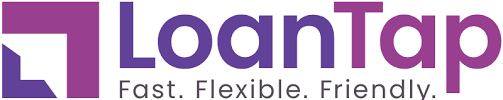<br><br>
</p>

# LoanTap
LoanTap is an online personal loan platform in India that offers quick and hassle-free customized loans up to ₹10 Lakhs with competitive rates to help millennials achieve a life that they desire. They differentiate in otherwise cluttered Personal Loan segment and deliver fastest Personal Loans at customer friendly terms. LoanTap has in-house RBI registered NBFC. Their focus is to delight the customers by helping them choose best loan products.
They boast of an experienced leadership and highly talented team, making them one of the fastest growing & trusted finTech company in the category.




##Problem Statement:
 As a data scientist at LoanTap,the task is to analyze the dataset to determine the creditworthiness of potential borrowers, MSMEs and individuals. The ultimate objective is to build a logistic regression model, evaluate its performance, and provide actionable insights for the underwriting process. Given a set of attributes for an Individual,have to determine if a credit line should be extended to them??<br>
If so, what should the repayment terms be in business recommendations?

# LoanTap Creditworthiness Analysis

This project focuses on building an underwriting layer for LoanTap, an online platform providing customized loan products. The objective is to determine whether a personal loan should be extended to an individual and recommend suitable repayment terms. This case study will address the underwriting process for personal loans only.

## Project Overview

The goal is to predict whether a credit line should be extended based on the provided data, using logistic regression for classification. We aim to identify real defaulters while minimizing false positives, ensuring we don’t disburse loans to individuals likely to default.

## Dataset

The dataset `LoanTapData.csv` contains attributes related to loan applicants and their financial and credit history. The target variable is `loan_status`, which indicates the current status of the loan.

### Key Features:

- **loan_amnt**: Amount of loan applied for
- **term**: Duration of loan (36 or 60 months)
- **int_rate**: Interest rate on the loan
- **installment** : The monthly payment owed by the borrower if the loan originates
- **grade**: LoanTap assigned loan grade
- **sub_grade** : LoanTap assigned loan subgrade
- **emp_title** :The job title supplied by the Borrower when applying for the loan.*
- **emp_length**: Borrower's employment length in years
- **home_ownership** : The home ownership status provided by the borrower during registration or obtained from the credit report.
- **annual_inc** : The self-reported annual income provided by the borrower during registration.
- **verification_status** : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
- **issue_d** : The month which the loan was funded
- **loan_status** : Current status of the loan - Target Variable
- **purpose** : A category provided by the borrower for the loan request.
- **title** : The loan title provided by the borrower
- **dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income, Debt-to-income ratio
- **earliest_cr_line** :The month the borrower's earliest reported credit line was opened
- **open_acc** : The number of open credit lines in the borrower's credit file.
- **pub_rec**: Number of derogatory public records
- **revol_bal**: Revolving credit balance
- **revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- **total_acc** : The total number of credit lines currently in the borrower's credit file
- **initial_list_status** : The initial listing status of the loan. Possible values are – W, F
- **application_type**: Individual or joint application
- **mort_acc**: Number of mortgage accounts
- **pub_rec_bankruptcies** : Number of public record bankruptcies
- **Address** : Address of the individual

## Conceptual Approach

1. **Exploratory Data Analysis (EDA)**:
   - Checking dataset structure, missing values, and outliers.
   - Visualization of relationships between features and the target variable (using count plots, box plots, heatmaps).
   - Checking correlations among independent variables.

2. **Feature Engineering**:
   - Creation of flag features: Convert categorical data to binary values for features like `pub_rec`, `mort_acc`, and `pub_rec_bankruptcies`.

3. **Missing Value & Outlier Treatment**:
   - Imputation of missing values and handling of outliers.

4. **Scaling**:
   - Normalization using MinMaxScaler or StandardScaler.

5. **Modeling**:
   - Logistic Regression for predicting loan approval.
   - Evaluation of results using:
     - Classification Report
     - ROC AUC Curve
     - Precision-Recall Curve

## Tradeoff Challenges

- **Minimizing False Positives**: Detecting real defaulters is crucial to avoid non-performing assets (NPAs), ensuring we only disburse loans to creditworthy individuals.
- **Precision vs Recall**: Optimizing the balance between precision (minimizing false positives) and recall (identifying true positives).





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer

from sklearn.metrics import  confusion_matrix, classification_report,ConfusionMatrixDisplay, f1_score, precision_score, recall_score,roc_auc_score, roc_curve,precision_recall_curve
# accuracy_score auc,
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')

In [ ]:
! gdown 14ll6JAy6Zz8RlOnB00x73NHQG35EA6Fv

Downloading...
From: https://drive.google.com/uc?id=14ll6JAy6Zz8RlOnB00x73NHQG35EA6Fv
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 46.4MB/s] 


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df= pd.read_csv('logistic_regression.csv')

In [ ]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
round(df.isnull().sum()/len(df)*100,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

In [ ]:
np.any(df.duplicated())

False

In [ ]:
df.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000

In [ ]:
df.describe(include='object')

term   grade sub_grade emp_title emp_length home_ownership  \
count       396030  396030    396030    373103     377729         396030   
unique           2       7        35    173105         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        302005  116018     26655      4389     126041         198348   

       verification_status   issue_d loan_status             purpose  \
count               396030    396030      396030              396030   
unique                   3       115           2                  14   
top               Verified  Oct-2014  Fully Paid  debt_consolidation   
freq                139563     14846      318357              234507   

                     title earliest_cr_line initial_list_status  \
count               394274           396030              396030   
unique               48816              684                   2   
top     Debt consolidation         Oct-2000                   f   
freq                152472             3017              238066   

       application_type                      address  
count            396030                       396030  
unique                3                       393700  
top          INDIVIDUAL  USCGC Smith\r\nFPO AE 70466  
freq             395319                            8

In [ ]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [ ]:
df['loan_amnt']=df['loan_amnt'].astype('int')
df['annual_inc']=df['annual_inc'].astype('int')
df['open_acc']=df['open_acc'].astype('int')
df['pub_rec']=df['pub_rec'].astype('int')
df['revol_bal']=df['revol_bal'].astype('int')
df['total_acc']=df['total_acc'].astype('int')

In [ ]:
df['term']=df['term'].str.strip().str[:2].astype('int')
df.rename(columns={'term':'term_in_month'},inplace=True)

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['purpose'], df['title'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
if p < 0.05:
    print("Reject the null hypothesis. There is a significant association between 'purpose' and 'title'.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between 'purpose' and 'title'.")


Chi-square statistic: 4523868.2107316125
P-value: 0.0
Reject the null hypothesis. There is a significant association between 'purpose' and 'title'.


In [ ]:
df.drop('title',axis=1,inplace=True)

In [ ]:
# Function to print basic useful details for categorial column
def get_column_details(df,column,plot_size,a=40,order=1):
    print("Details of",column,"column")
    print('*'*50)

    #DataType of column
    print("\nDataType: ",df[column].dtype)
    print('*'*50)


    #Get Number of Unique Values
    print(f"\nNumber of Unique Values: {df[column].nunique()}, having Missing Values: {df[column].isnull().sum()}")
    print('*'*50)

    print(f"\nUnique Values are : {df[column].unique()[:a]}")
    print('*'*50)

    #Get Category counts of Column
    print(f"\nCount of Customers {column} wise:\n")
    print(df[column].value_counts()[:a])
    print('*'*50)
    print(f"\nPercentage of customers - {column} wise:\n")
    print(round(df[column].value_counts(normalize=True)[:a]*100,2))
    print('*'*50)

    # get category counts with loan_status
    print(f"\nCount of Customers {column}, Loan_status wise:\n")
    print(df.groupby(column)['loan_status'].value_counts(normalize=True)[:a])
    print('*'*50)


    if order==1:
    # Get the order based on value counts
      order = df[column].value_counts().index[:a]

    elif order==0:
      order = sorted(df[column].unique().tolist())[:a]

    # Create a summary DataFrame
    summary = df.groupby([column, 'loan_status']).size().reset_index(name='count').sort_values(by='count', ascending=False)

    # Visualizing plot
    plt.figure(figsize=plot_size)

    plt.subplot(1, 2, 1)
    plt.title(f"\n\nNumber of Customers {column} wise\n")
    df[column].value_counts().loc[order].plot(kind='bar', color='skyblue')
    plt.xticks(rotation=90)

    plt.subplot(1, 2, 2)
    sns.barplot(x=summary[column], y='count', hue='loan_status', data=summary[summary[column].isin(order)], order=order,palette='Spectral')
    plt.title(f"\n\nNumber of Customers {column}, Loan Status Wise\n")
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

Details of grade column
**************************************************

DataType:  object
**************************************************

Number of Unique Values: 7, having Missing Values: 0
**************************************************

Unique Values are : ['B' 'A' 'C' 'E' 'D' 'F' 'G']
**************************************************

Count of Customers grade wise:

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64
**************************************************

Percentage of customers - grade wise:

grade
B    29.30
C    26.76
A    16.21
D    16.04
E     7.95
F     2.97
G     0.77
Name: proportion, dtype: float64
**************************************************

Count of Customers grade, Loan_status wise:

grade  loan_status
A      Fully Paid     0.937121
       Charged Off    0.062879
B      Fully Paid     0.874270
       Charged Off    0.125730
C      Fully Paid     0.788191
       Charged Off   

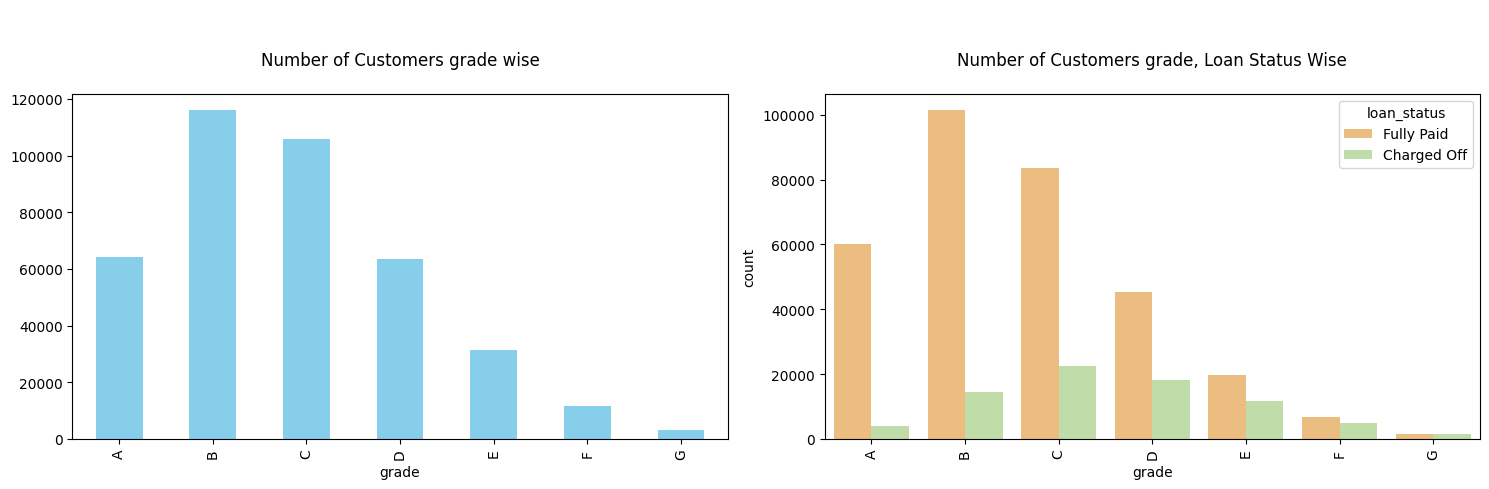

In [ ]:
get_column_details(df,'grade',(15,5),a=20,order=0)

Details of sub_grade column
**************************************************

DataType:  object
**************************************************

Number of Unique Values: 35, having Missing Values: 0
**************************************************

Unique Values are : ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
**************************************************

Count of Customers sub_grade wise:

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64
*

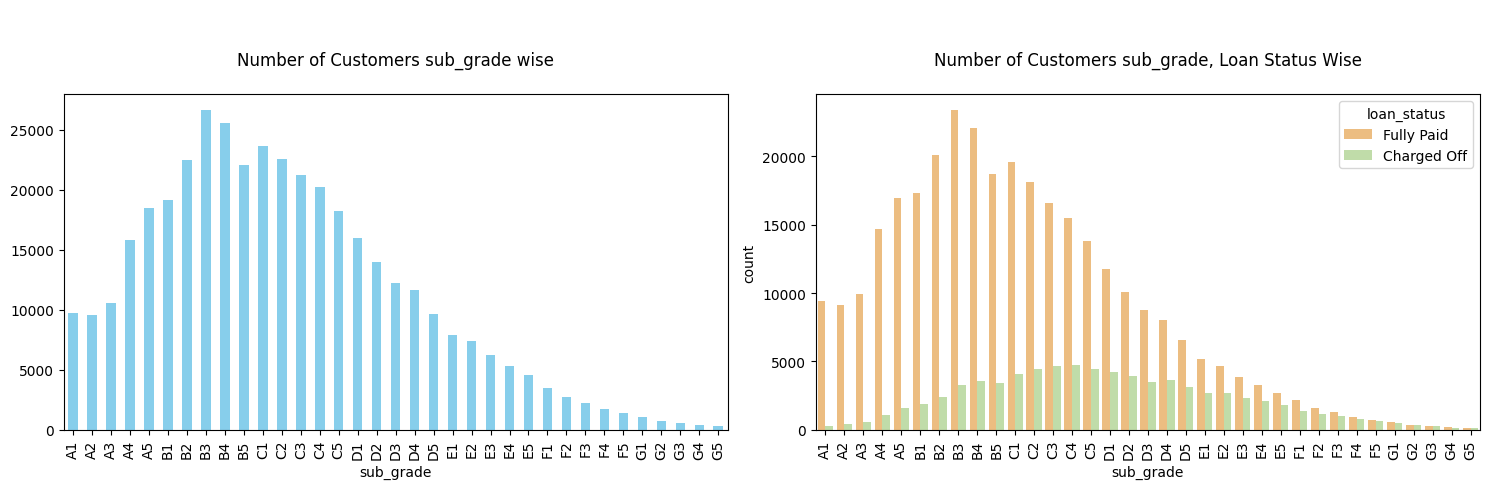

In [ ]:
get_column_details(df,'sub_grade',(15,5),order=0)

Details of emp_title column
**************************************************

DataType:  object
**************************************************

Number of Unique Values: 154014, having Missing Values: 22927
**************************************************

Unique Values are : ['marketing' 'credit analyst ' 'statistician' 'client advocate'
 'destiny management inc.' 'hr specialist' 'software development engineer'
 'office depot' 'application architect' 'regado biosciences' 'sodexo'
 'director bureau of equipment inventory' 'social work/care manager'
 'regional counsel' 'pullman regional hospital' 'firefighter'
 'comcast corporate office' 'principal' 'pilot' 'registered nurse'
 'personal trainer' 'francis howell school district' 'midstate steel llc'
 'office manager' 'operations manager' 'csu monterey bay' 'bartender'
 'anheuser-busch ' 'teacher' 'sr. business analyst' 'medtronic, inc.'
 'stocker' 'american heart association' 'senior software engineer'
 'dealer' nan 'facility tech

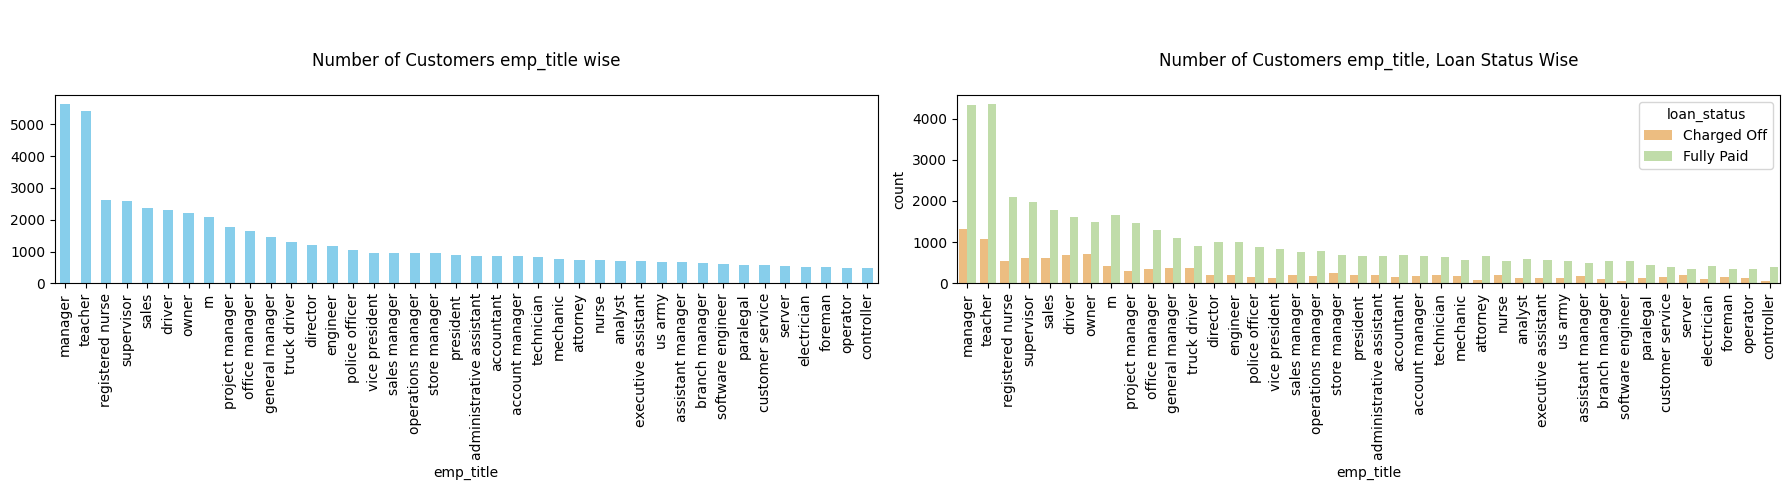

In [ ]:
df['emp_title']=df['emp_title'].str.lower()
get_column_details(df,'emp_title',(18,5),a=40)

In [ ]:
df[df['emp_title']=='teacher']['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     80.202578
Charged Off    19.797422
Name: proportion, dtype: float64

In [ ]:
df[df['emp_title']=='manager']['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     76.636509
Charged Off    23.363491
Name: proportion, dtype: float64

In [ ]:
df[df['emp_title']=='controller']['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     86.382979
Charged Off    13.617021
Name: proportion, dtype: float64

In [ ]:
df[df['emp_title']=='sales']['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     74.307305
Charged Off    25.692695
Name: proportion, dtype: float64

In [ ]:
df[df['emp_title']=='zynga']['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid    100.0
Name: proportion, dtype: float64

In [ ]:
df[~df['emp_title'].isnull()]['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.807747
Charged Off    0.192253
Name: proportion, dtype: float64

We can see the distribution of loan status is varying for all titles, so we cant assume about missing values to be anything. So better approach is to be either drop them or impute throu KNN Imputer.

In [ ]:
df.groupby('emp_title')['loan_status'].value_counts(normalize=True)*100

emp_title                         loan_status
       nsa industries llc         Fully Paid     100.0
   fibro source                   Fully Paid     100.0
   long ilsand college hospital   Charged Off    100.0
   mortgage banker                Charged Off    100.0
  credit rev specialist           Charged Off    100.0
                                                 ...  
zymo research                     Fully Paid     100.0
zynga                             Fully Paid     100.0
zynga inc                         Fully Paid     100.0
zynx health                       Fully Paid     100.0
​license compliance investigator  Fully Paid     100.0
Name: proportion, Length: 165882, dtype: float64

Details of emp_length column
**************************************************

DataType:  object
**************************************************

Number of Unique Values: 11, having Missing Values: 18301
**************************************************

Unique Values are : ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]
**************************************************

Count of Customers emp_length wise:

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64
**************************************************

Percentage of customers - emp_length wise:

emp_length
10+ years    33.37
2 years       9.48
< 1 year      8.40
3 years       8.38
5 years       7.01
1 year        6.85
4 years       6.34
6 years       

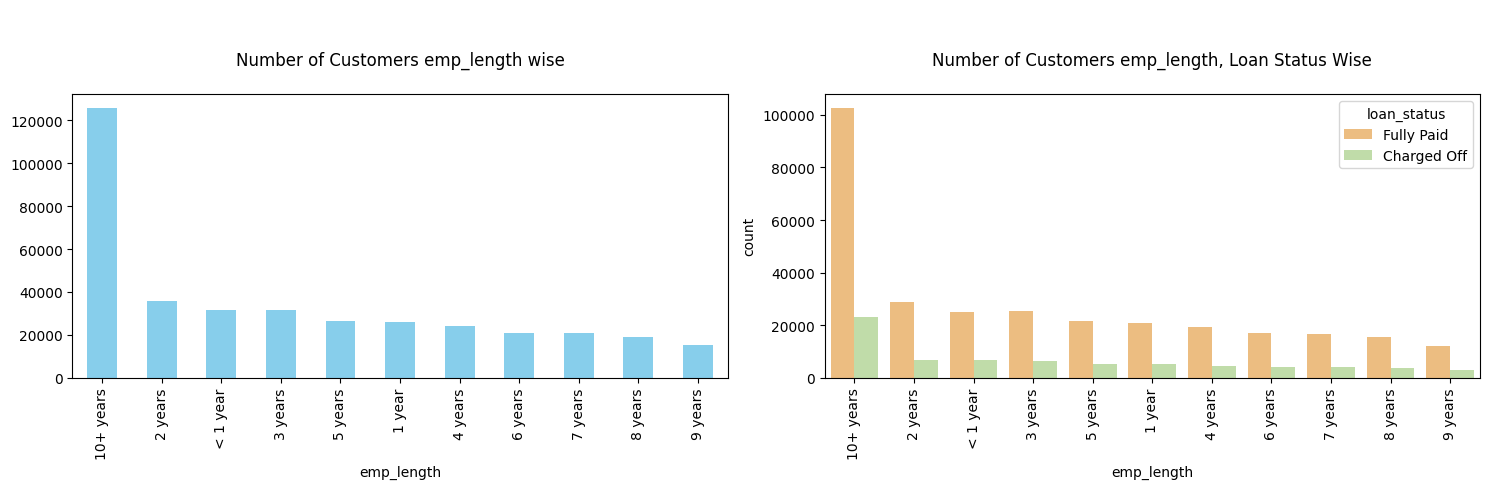

In [ ]:
get_column_details(df,'emp_length',(15,5))

In [ ]:
df[df['emp_length'].isnull()]['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     72.47145
Charged Off    27.52855
Name: proportion, dtype: float64

In [ ]:
df['emp_length_in_years']=df['emp_length'].str[:2].str.strip().replace('<',0.5).astype('float')
emp_len_impute=df.groupby('loan_status')['emp_length_in_years'].mean().round(2)
df['emp_length_in_years']=df['emp_length_in_years'].fillna(df['loan_status'].map(emp_len_impute))

Details of home_ownership column
**************************************************

DataType:  object
**************************************************

Number of Unique Values: 6, having Missing Values: 0
**************************************************

Unique Values are : ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']
**************************************************

Count of Customers home_ownership wise:

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64
**************************************************

Percentage of customers - home_ownership wise:

home_ownership
MORTGAGE    50.08
RENT        40.35
OWN          9.53
OTHER        0.03
NONE         0.01
ANY          0.00
Name: proportion, dtype: float64
**************************************************

Count of Customers home_ownership, Loan_status wise:

home_ownership  loan_status
ANY             Fully Paid     1.00

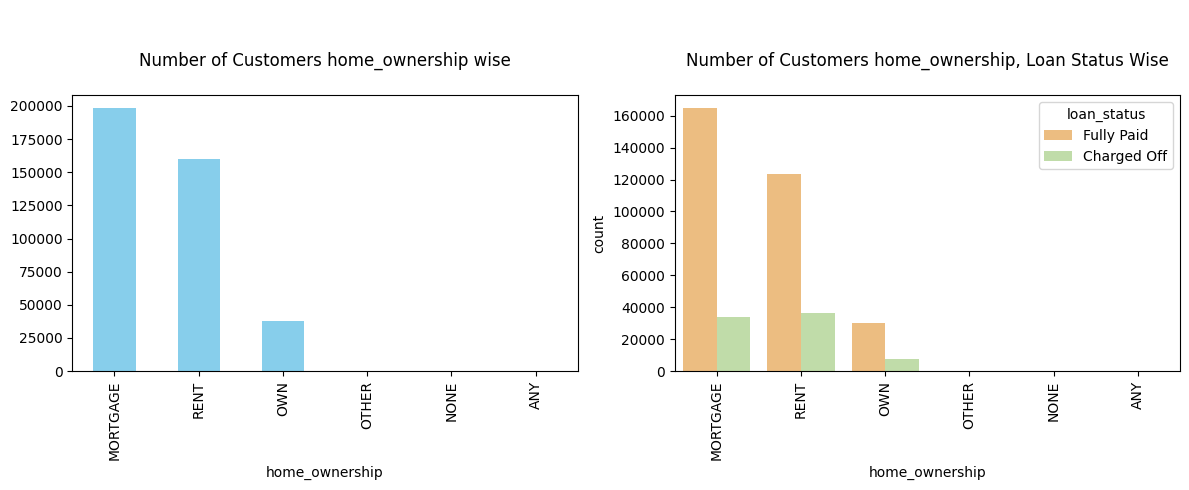

In [ ]:
get_column_details(df,'home_ownership',(12,5))

In [ ]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'),'home_ownership']='OTHER'       # loc changes original df
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

Details of home_ownership column
**************************************************

DataType:  object
**************************************************

Number of Unique Values: 4, having Missing Values: 0
**************************************************

Unique Values are : ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
**************************************************

Count of Customers home_ownership wise:

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64
**************************************************

Percentage of customers - home_ownership wise:

home_ownership
MORTGAGE    50.08
RENT        40.35
OWN          9.53
OTHER        0.04
Name: proportion, dtype: float64
**************************************************

Count of Customers home_ownership, Loan_status wise:

home_ownership  loan_status
MORTGAGE        Fully Paid     0.830439
                Charged Off    0.169561
OTHER           Fully Paid     0.842466
  

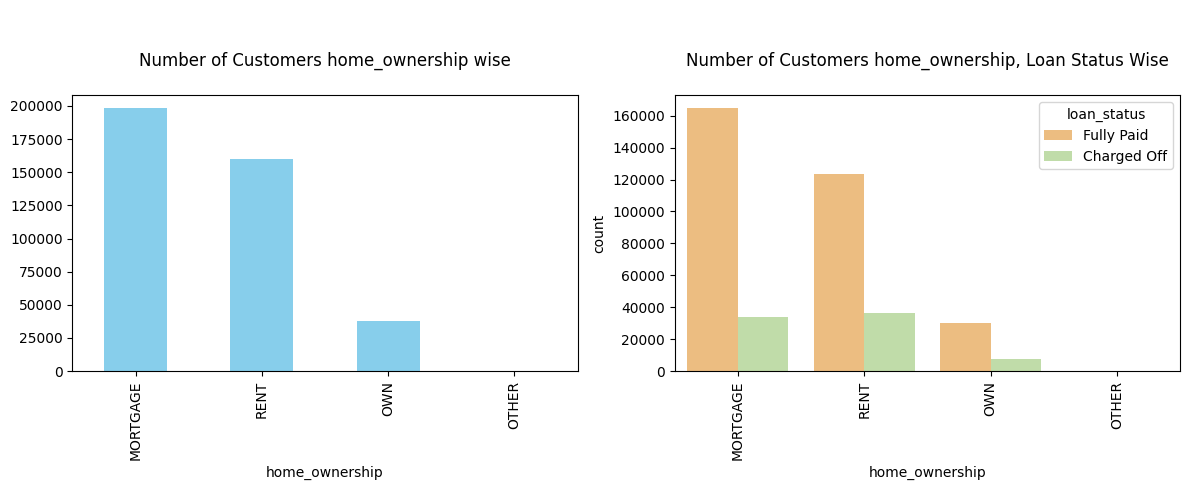

In [ ]:
get_column_details(df,'home_ownership',(12,5))

Details of verification_status column
**************************************************

DataType:  object
**************************************************

Number of Unique Values: 3, having Missing Values: 0
**************************************************

Unique Values are : ['Not Verified' 'Source Verified' 'Verified']
**************************************************

Count of Customers verification_status wise:

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64
**************************************************

Percentage of customers - verification_status wise:

verification_status
Verified           35.24
Source Verified    33.18
Not Verified       31.58
Name: proportion, dtype: float64
**************************************************

Count of Customers verification_status, Loan_status wise:

verification_status  loan_status
Not Verified         Fully Paid     0.853640
                     Char

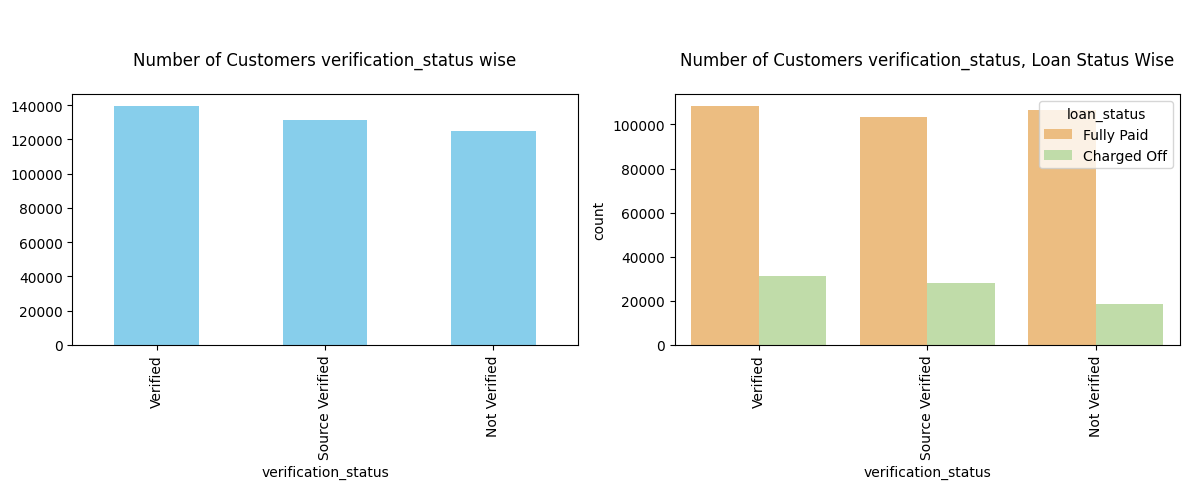

In [ ]:
get_column_details(df,'verification_status',(12,5))

In [ ]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['issue_year']=df['issue_d'].dt.year
df['issue_month']=df['issue_d'].dt.month

Details of issue_year column
**************************************************

DataType:  int32
**************************************************

Number of Unique Values: 10, having Missing Values: 0
**************************************************

Unique Values are : [2015 2014 2013 2012 2016 2011 2010 2008 2009 2007]
**************************************************

Count of Customers issue_year wise:

issue_year
2014    102860
2013     97662
2015     94264
2012     41202
2016     28088
2011     17435
2010      9258
2009      3826
2008      1240
2007       195
Name: count, dtype: int64
**************************************************

Percentage of customers - issue_year wise:

issue_year
2014    25.97
2013    24.66
2015    23.80
2012    10.40
2016     7.09
2011     4.40
2010     2.34
2009     0.97
2008     0.31
2007     0.05
Name: proportion, dtype: float64
**************************************************

Count of Customers issue_year, Loan_status wise:

issue_year  lo

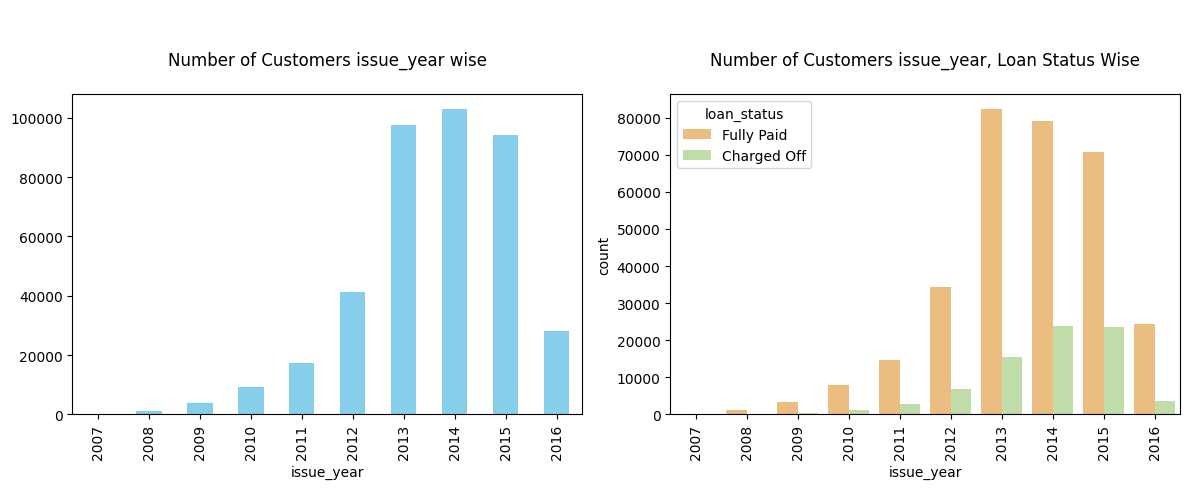

In [ ]:
get_column_details(df,'issue_year',(12,5),order=0)

customers declining

Details of issue_month column
**************************************************

DataType:  int32
**************************************************

Number of Unique Values: 12, having Missing Values: 0
**************************************************

Unique Values are : [ 1 11  4  9 10  6  5 12  7  2  3  8]
**************************************************

Count of Customers issue_month wise:

issue_month
10    42130
7     39714
1     34682
11    34068
4     33223
8     32816
3     31919
5     31895
6     30140
12    29082
2     28742
9     27619
Name: count, dtype: int64
**************************************************

Percentage of customers - issue_month wise:

issue_month
10    10.64
7     10.03
1      8.76
11     8.60
4      8.39
8      8.29
3      8.06
5      8.05
6      7.61
12     7.34
2      7.26
9      6.97
Name: proportion, dtype: float64
**************************************************

Count of Customers issue_month, Loan_status wise:

issue_month  loan_status

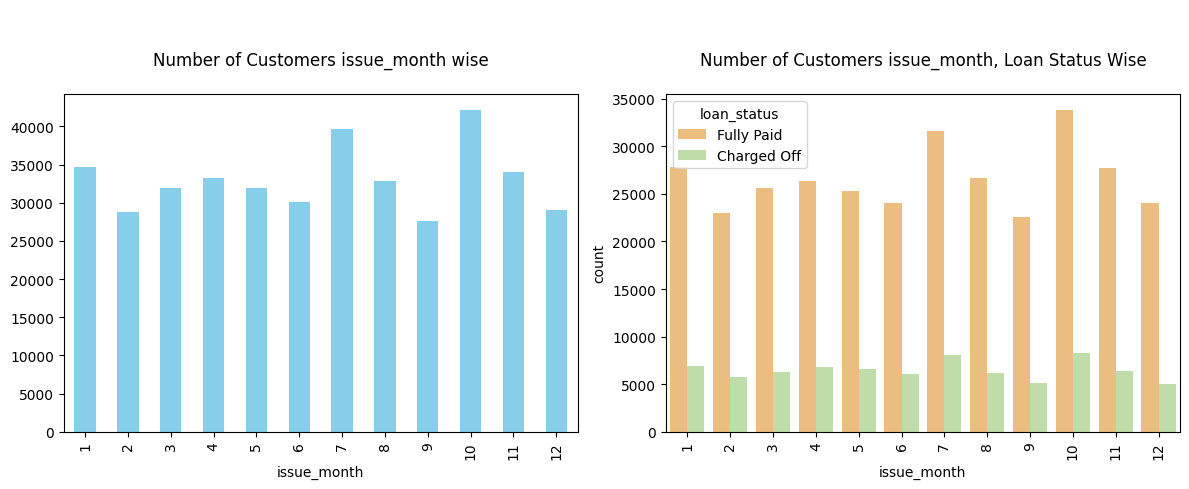

In [ ]:
get_column_details(df,'issue_month',(12,5),order=0)

Details of purpose column
**************************************************

DataType:  object
**************************************************

Number of Unique Values: 14, having Missing Values: 0
**************************************************

Unique Values are : ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
**************************************************

Count of Customers purpose wise:

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64
*************

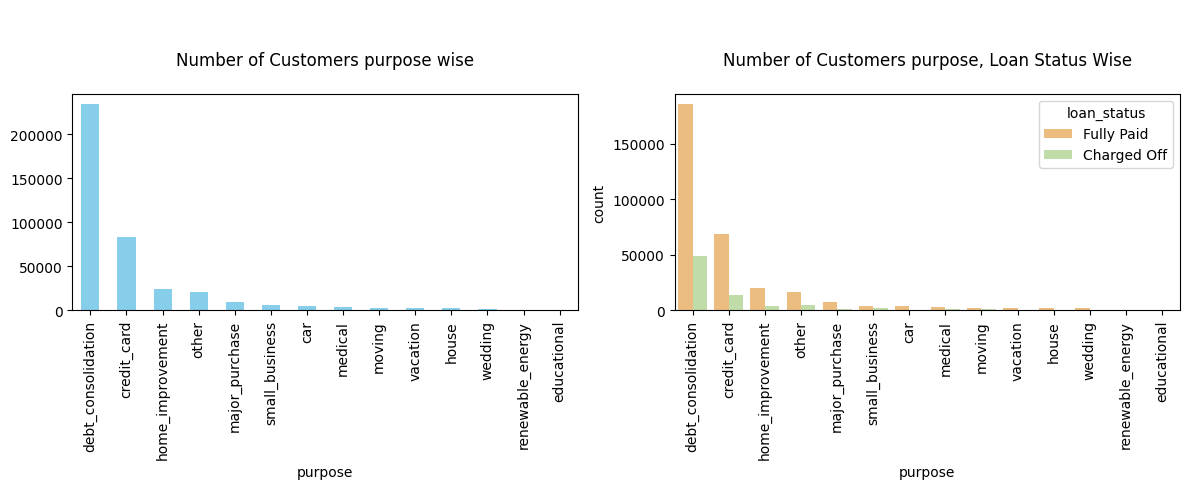

In [ ]:
get_column_details(df,'purpose',(12,5))

In [ ]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line_year']=df['earliest_cr_line'].dt.year
df['earliest_cr_line_month']=df['earliest_cr_line'].dt.month

Details of earliest_cr_line_year column
**************************************************

DataType:  int32
**************************************************

Number of Unique Values: 65, having Missing Values: 0
**************************************************

Unique Values are : [1990 2004 2007 2006 1999 2005 1994 1997 1984 1995 2001 1982 1996 2000
 2003 2008 1998 2002 2009 1992 1988 2010 1986 2012 1978 1993 1983 1989
 1991 2011 1980 1981 1987 1985 1967 1972 1969 1979 1965 1977]
**************************************************

Count of Customers earliest_cr_line_year wise:

earliest_cr_line_year
2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
1998    22745
2004    20914
1997    18761
1996    18413
2005    17401
1995    16964
1994    15440
2006    15119
1993    12124
2007    11313
1992     8891
1990     8542
1991     8127
1989     7623
2008     7098
1988     6271
1987     5537
1986     4668
1985     4161
2009     3874
1984     3763
2010     3156
1983     

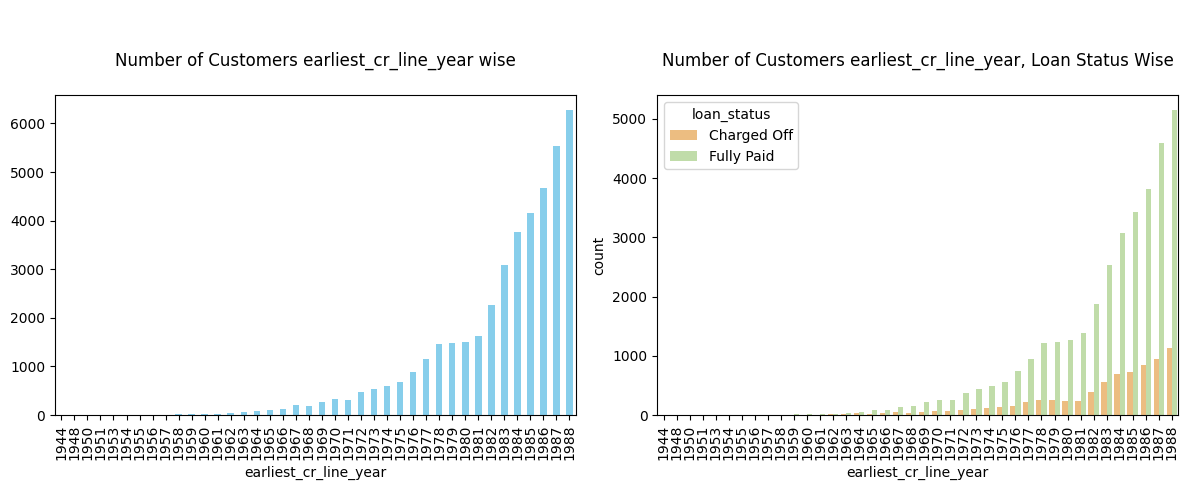

In [ ]:
get_column_details(df,'earliest_cr_line_year',(12,5),order=0)

Details of earliest_cr_line_month column
**************************************************

DataType:  int32
**************************************************

Number of Unique Values: 12, having Missing Values: 0
**************************************************

Unique Values are : [ 6  7  8  9  3  1 12  5  4 10  2 11]
**************************************************

Count of Customers earliest_cr_line_month wise:

earliest_cr_line_month
10    38291
9     37673
8     37349
11    35583
12    33687
7     31972
3     31617
1     30694
6     30445
5     30445
4     29231
2     29043
Name: count, dtype: int64
**************************************************

Percentage of customers - earliest_cr_line_month wise:

earliest_cr_line_month
10    9.67
9     9.51
8     9.43
11    8.98
12    8.51
7     8.07
3     7.98
1     7.75
6     7.69
5     7.69
4     7.38
2     7.33
Name: proportion, dtype: float64
**************************************************

Count of Customers earliest_cr_l

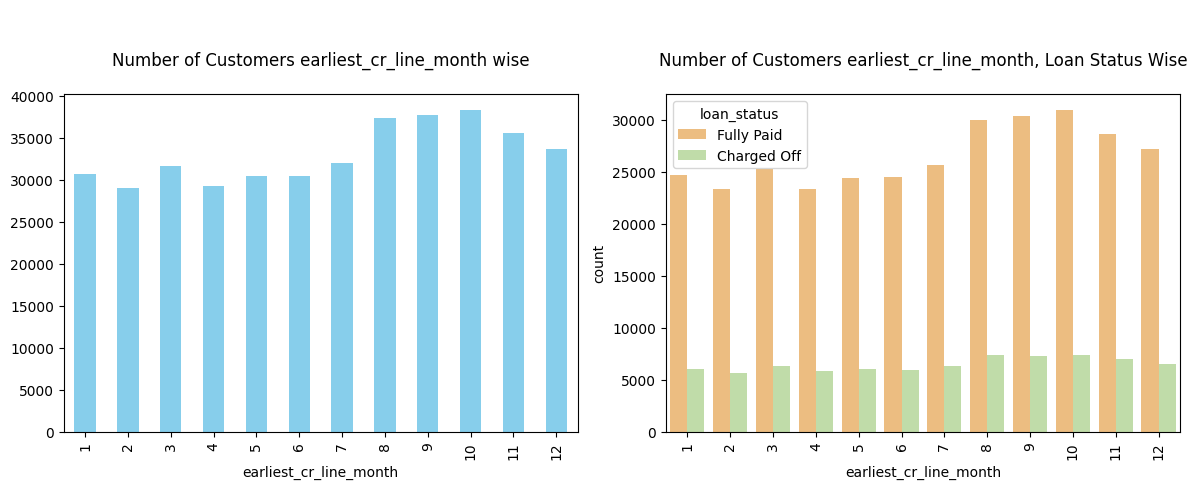

In [ ]:
get_column_details(df,'earliest_cr_line_month',(12,5),order=0)

Details of initial_list_status column
**************************************************

DataType:  object
**************************************************

Number of Unique Values: 2, having Missing Values: 0
**************************************************

Unique Values are : ['w' 'f']
**************************************************

Count of Customers initial_list_status wise:

initial_list_status
f    238066
w    157964
Name: count, dtype: int64
**************************************************

Percentage of customers - initial_list_status wise:

initial_list_status
f    60.11
w    39.89
Name: proportion, dtype: float64
**************************************************

Count of Customers initial_list_status, Loan_status wise:

initial_list_status  loan_status
f                    Fully Paid     0.806940
                     Charged Off    0.193060
w                    Fully Paid     0.799245
                     Charged Off    0.200755
Name: proportion, dtype: float64


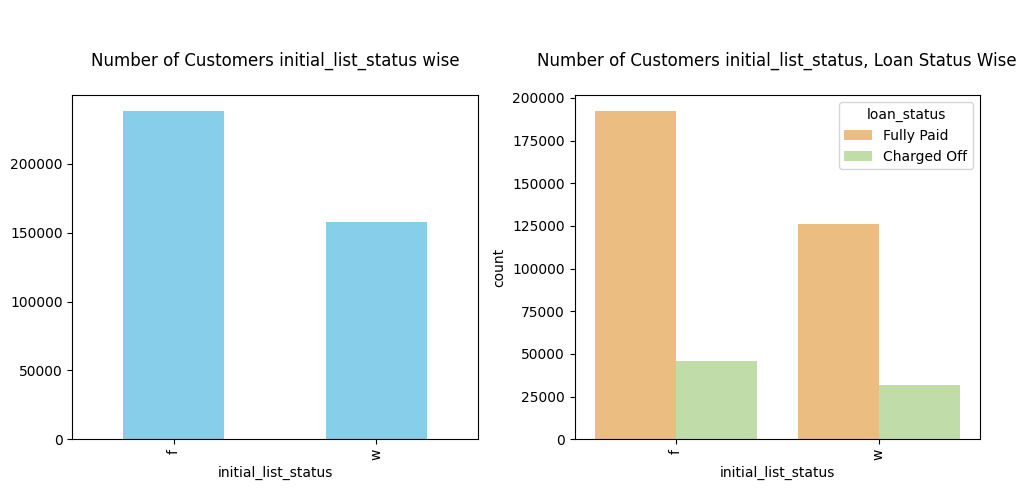

In [ ]:
get_column_details(df,'initial_list_status',(10,5))

Details of application_type column
**************************************************

DataType:  object
**************************************************

Number of Unique Values: 3, having Missing Values: 0
**************************************************

Unique Values are : ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']
**************************************************

Count of Customers application_type wise:

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64
**************************************************

Percentage of customers - application_type wise:

application_type
INDIVIDUAL    99.82
JOINT          0.11
DIRECT_PAY     0.07
Name: proportion, dtype: float64
**************************************************

Count of Customers application_type, Loan_status wise:

application_type  loan_status
DIRECT_PAY        Fully Paid     0.643357
                  Charged Off    0.356643
INDIVIDUAL        Fully Paid     0.803913
     

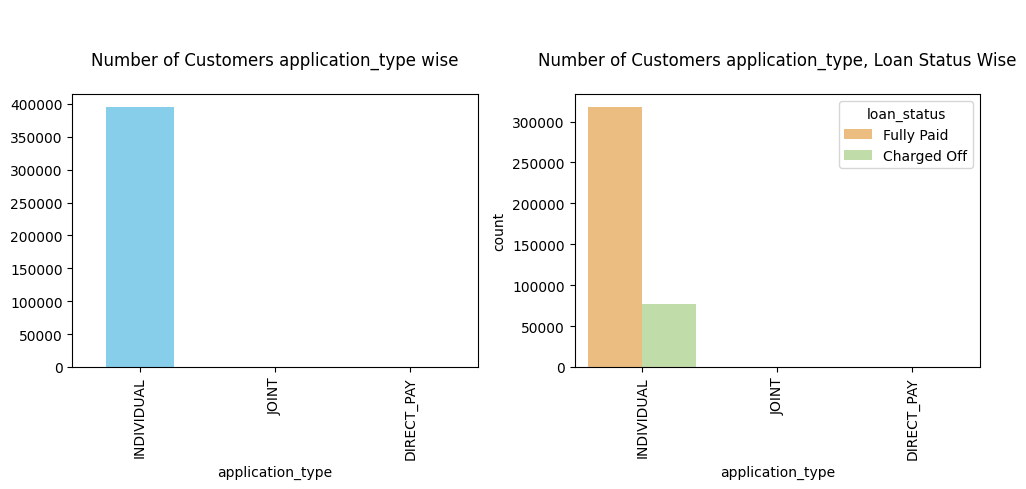

In [ ]:
get_column_details(df,'application_type',(10,5))

In [ ]:
df.groupby(['pub_rec_bankruptcies'])['loan_status'].value_counts()

pub_rec_bankruptcies  loan_status
0.0                   Fully Paid     282059
                      Charged Off     68321
1.0                   Fully Paid      34063
                      Charged Off      8727
2.0                   Fully Paid       1418
                      Charged Off       429
3.0                   Fully Paid        277
                      Charged Off        74
4.0                   Fully Paid         56
                      Charged Off        26
5.0                   Fully Paid         27
                      Charged Off         5
6.0                   Fully Paid          5
                      Charged Off         2
7.0                   Fully Paid          3
                      Charged Off         1
8.0                   Charged Off         1
                      Fully Paid          1
Name: count, dtype: int64

In [ ]:
print('Rows before deleting missing Values:',df.shape[0])
df=df.dropna(subset=['pub_rec_bankruptcies'])
print('Rows after deleting missing Values:',df.shape[0])

Rows before deleting missing Values: 396030
Rows after deleting missing Values: 395495


Details of pub_rec_bankruptcies column
**************************************************

DataType:  float64
**************************************************

Number of Unique Values: 9, having Missing Values: 0
**************************************************

Unique Values are : [0. 1. 2. 3. 4. 5. 6. 7. 8.]
**************************************************

Count of Customers pub_rec_bankruptcies wise:

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64
**************************************************

Percentage of customers - pub_rec_bankruptcies wise:

pub_rec_bankruptcies
0.0    88.59
1.0    10.82
2.0     0.47
3.0     0.09
4.0     0.02
5.0     0.01
6.0     0.00
7.0     0.00
8.0     0.00
Name: proportion, dtype: float64
**************************************************

Count of Customers pub_rec_bankruptcies, Loan_status wise:

pub_rec_bankruptcies  l

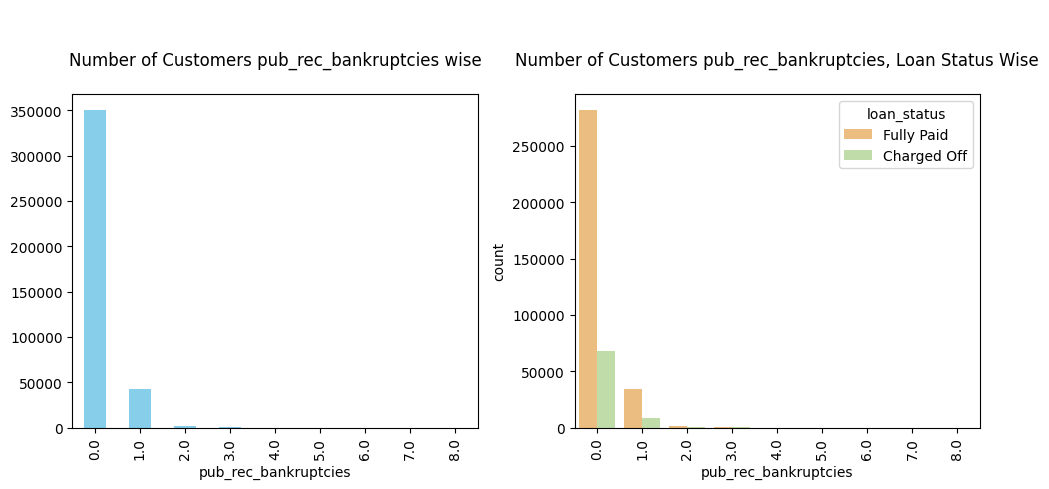

In [ ]:
get_column_details(df,'pub_rec_bankruptcies',(10,5))

In [ ]:
df['add_code']=df['address'].str.split().str[-1].str.strip().astype('int')

Details of add_code column
**************************************************

DataType:  int64
**************************************************

Number of Unique Values: 10, having Missing Values: 0
**************************************************

Unique Values are : [22690  5113   813 11650 30723 70466 29597 48052 86630 93700]
**************************************************

Count of Customers add_code wise:

add_code
70466    56922
30723    56452
22690    56446
48052    55844
813      45756
29597    45409
5113     45339
11650    11219
93700    11140
86630    10968
Name: count, dtype: int64
**************************************************

Percentage of customers - add_code wise:

add_code
70466    14.39
30723    14.27
22690    14.27
48052    14.12
813      11.57
29597    11.48
5113     11.46
11650     2.84
93700     2.82
86630     2.77
Name: proportion, dtype: float64
**************************************************

Count of Customers add_code, Loan_status wise:

add_co

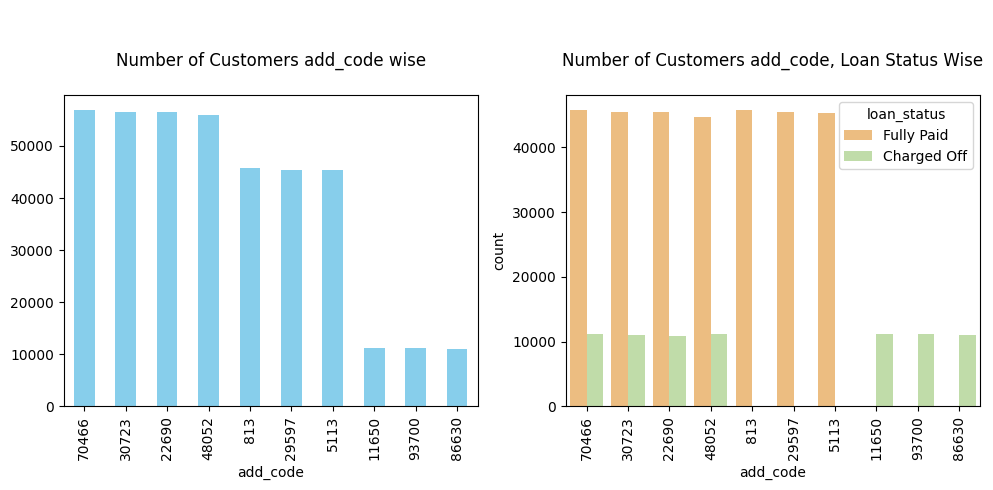

In [ ]:
get_column_details(df,'add_code',(10,5))

In [ ]:
df["state"] = df["address"].apply(lambda x: x[-8:-6])
print("Number of unique values for state :",df["state"].nunique())

Number of unique values for state : 54


In [ ]:
df.drop(columns=['issue_d','earliest_cr_line','address','emp_length'],inplace=True)

* Loan Characteristics:

  * Loan Term: The most common loan term is 36 months (3 years).
  * Loan Grade and Subgrade: The majority of loans are categorized as grade B with a subgrade of B3.
* Borrower Characteristics:

  * Employment Tenure: Most borrowers have been employed for at least 10 years.
  * Home Ownership: A significant portion of borrowers already own their home and have a mortgage.
  * Verification Status: In 70% of cases, borrower details are verified.
* Loan Purpose and Repayment:

  * Loan Purpose: The most frequent reason for taking a loan is debt consolidation.
  * Loan Repayment Rate: A high percentage (80%) of borrowers fully repay their loans ("loan_status is fully paid").
  * Application Type: The vast majority (99.5%) of loan applications are submitted by individual borrowers.

The dataset includes loan information from the years 2007 to 2016.
* Loan Characteristics:

  * Loan Amount: The average loan amount is \$14,000, with half of borrowers requesting \$12,000 or less. The maximum loan amount is \$ 40,000.
  * Interest Rate: Interest rates range from 5.32% to 31%, with an average of 13%.
  * Installment Amount: The average monthly installment amount is \$430, with a maximum of \$1,500.
* Borrower Characteristics:

  * Annual Income: Borrowers have an average annual income of \$74,000, with the highest income reaching \$8.7 million.
  * Credit Lines: Most borrowers have 10 or more open credit lines.
  * Mortgages: Around 50% of borrowers do not have a mortgage.
  * Bankruptcies: A significant portion (75%) of borrowers have no record of public record bankruptcies ("pub_rec_bankruptcies").




Based upon Univariate Analysis:

* Loan Characteristics:

  * Loan Term: The most common loan term is 36 months, followed by 60 months. This suggests that a majority of borrowers prefer shorter repayment periods.
  * Loan Grade and Subgrade: The majority of loans fall under grade B, with subgrade B3 being the most frequent. This indicates that a significant portion of borrowers have a moderate credit risk. However, the presence of 35 unique subgrades suggests a wide range of creditworthiness within this category.
* Borrower Characteristics:

  * Employment Tenure: Most borrowers have been employed for at least 10 years. This could indicate a level of financial stability among borrowers.
  * Home Ownership: A large portion of borrowers already own their homes (categories like MORTGAGE and OWN). This could be a factor influencing loan approval or loan purpose (e.g., home improvement).
* Loan Performance and Verification:

  * Verification Status: 70% of borrowers have their details verified. This suggests a focus on verifying borrower information.
  * Loan Status: A high percentage (80%) of loans are fully paid, indicating a good repayment rate.
  * Application Type: The vast majority (99.5%) of applications are from individual borrowers. This suggests that joint applications are uncommon.
* Data Considerations:

  * Zipcode and State: The high number of unique categories for zipcode (540) and state (54) indicates a geographically diverse borrower population. Further analysis might involve grouping states or zip codes into regions for deeper insights.
  * Missing Values: The presence of missing values in emp_length needs to be addressed (e.g., imputation or removal) before further analysis.
  

* Data Overview:

   * Size: 3.96 million rows
   * Features: 27 columns
   * Duplicates: No duplicates found
* Missing Values:

  * emp_length: 5.79% missing values
  * emp_title: 4.62% missing values
  * mort_acc: 9.54% missing values
* Data Cleaning:

  * Date Features:
    * Columns "earliest_cr_line" and "issue_d" were identified as containing date information. Their data types have been converted to datetime format for proper handling of time-based data. These features are then dropped from dataframe.
    *  The "Source Verified" and "Verified" categories in the "verification_status" feature have been merged.
  * Address Extraction: Two features, "state" and "zipcode", were extracted from the "address" feature. The original "address" feature was then dropped to avoid redundancy.


Insights based upon Bivariate Analysis:

* Loan Term:

  * A higher percentage of charged-off loans have a term of 36 months (61.33%) compared to fully paid loans (79.90%). This suggests that shorter loan terms might be associated with a higher risk of default.
  Loan Grade and Subgrade:

  * Charged-off loans are more concentrated in lower loan grades (C, D, E, F) compared to fully paid loans. The subgrade distribution also reflects this, with a higher proportion of charged-off loans in subgrades like C4, C3, and D1. This indicates a clear correlation between creditworthiness and loan performance.
* Borrower Characteristics:

  * Employment tenure seems to have minimal impact, with a similar distribution across both loan statuses.

  * Homeownership: There's a significant difference in homeownership between loan statuses. A higher proportion of fully paid loans are associated with borrowers who own their homes (mortgage and own categories) compared to charged-off loans. This suggests that homeownership might be a factor contributing to responsible borrowing and repayment.

* Loan Verification and Repayment:

  * Loan verification: A larger portion of charged-off loans lack verification (23.57%) compared to fully paid loans (33.54%). This highlights the importance of borrower verification in reducing loan defaults.
  Loan Purpose:

  * Debt consolidation is the most common purpose for both charged-off and fully paid loans. However, the proportion is slightly higher for charged-off loans (62.62% vs 58.38%). This might indicate that debt consolidation loans are used for higher-risk borrowers who struggle with existing debt.

#### Correlation Heatmap -

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible.

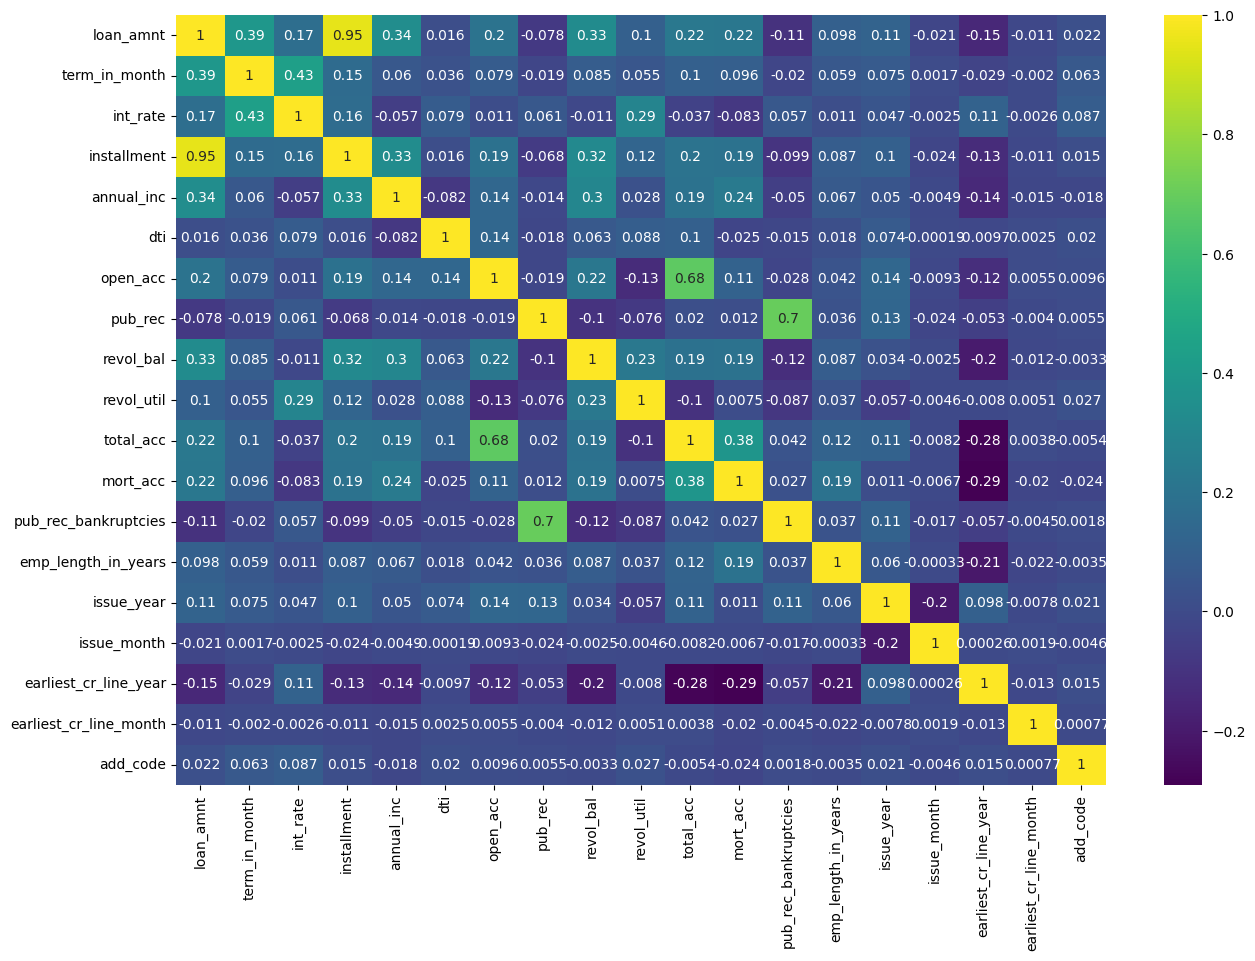

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='viridis')
plt.show()

We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

installment: The monthly payment owed by the borrower if the loan originates.
loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
So, we can drop either one of those columns.

In [ ]:
df.drop('installment',axis=1,inplace=True)

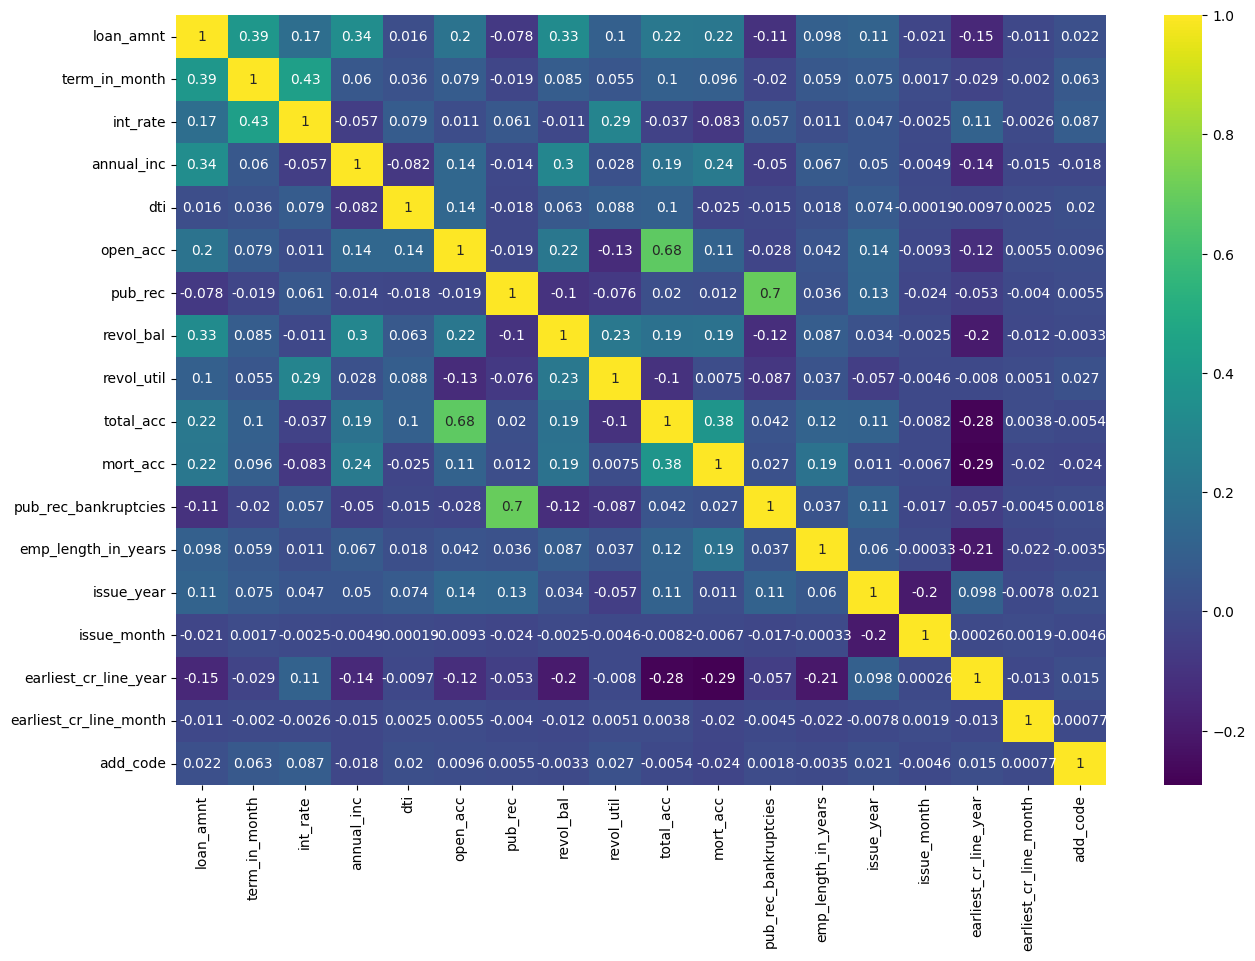

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='viridis')
plt.show()

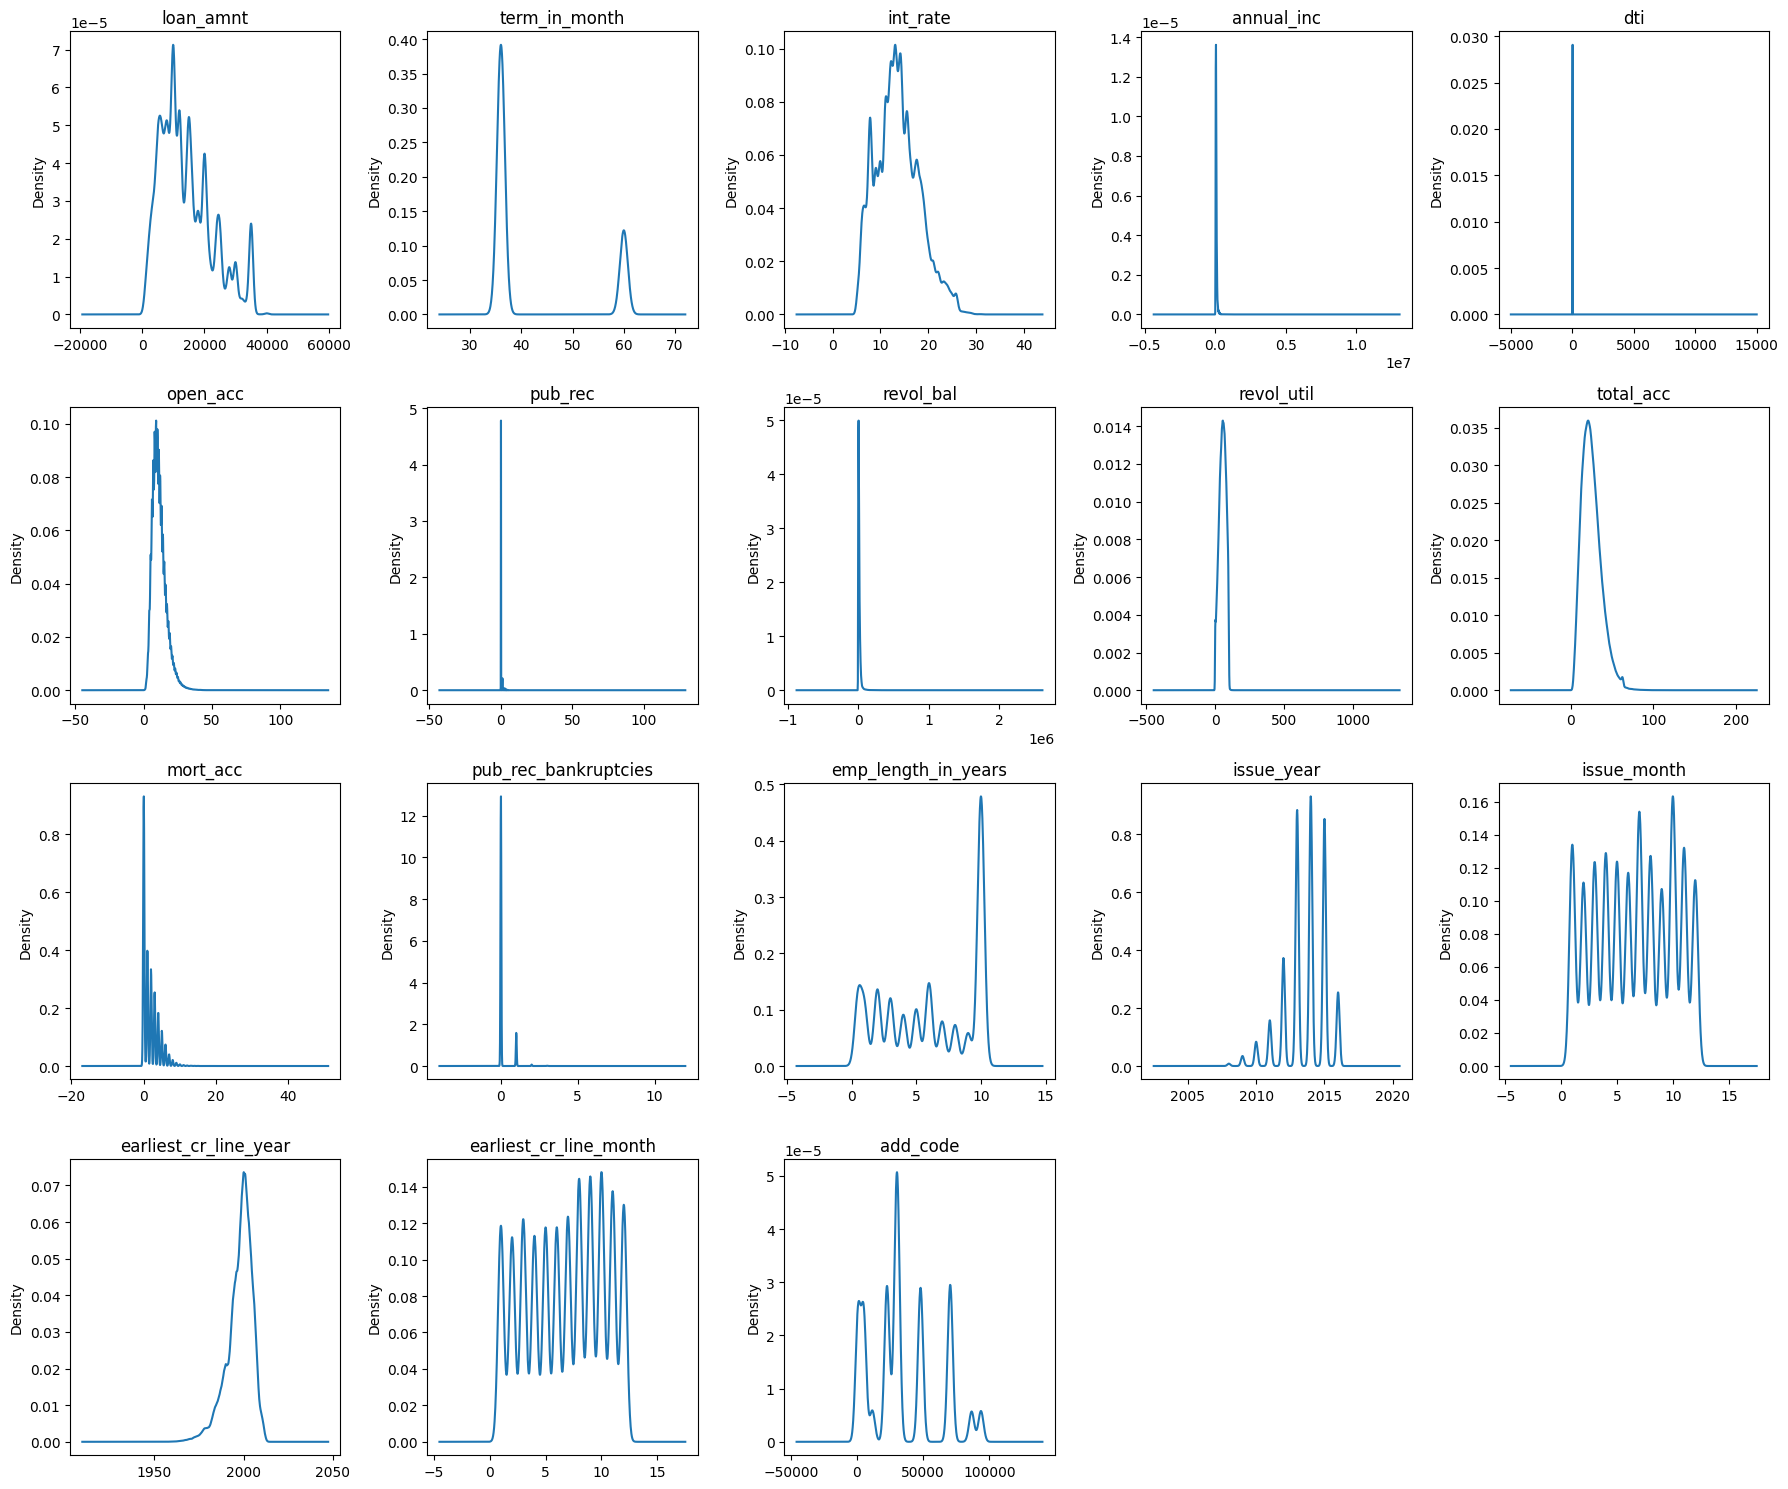

In [ ]:
# Get the list of numerical columns
df_num = df.select_dtypes(include='number').columns.to_list()

# Set the figure size
plt.rcParams["figure.figsize"] = [18, 15]

# Loop through each numerical column
for idx, col in enumerate(df_num, start=1):
    plt.subplot(4, 5, idx)  # Use idx for the subplot index
    plt.title(col)
    df[col].plot(kind='kde')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
def get_numeric_col_details(column,p_size,a):

  plt.figure(figsize=p_size)
  plt.subplot(2,2,1)
  sns.histplot(df[column],kde=True,bins=a)
  plt.title(f"\n\nDistribution of {column}\n")

  plt.subplot(2,2,2)
  sns.boxplot(df[column])
  plt.title(f"\n\nBoxplot of {column}\n")

  plt.subplot(2,2,3)
  sns.histplot(data=df,x=column,hue='loan_status',kde=True,bins=a)
  plt.title(f"\n\nDistribution of {column} with Loan Status\n")

  plt.subplot(2,2,4)
  sns.boxplot(x='loan_status',y=column,data=df)
  plt.title(f"\n\nBoxplot of {column} with Loan Status\n")

  plt.tight_layout()
  plt.show()

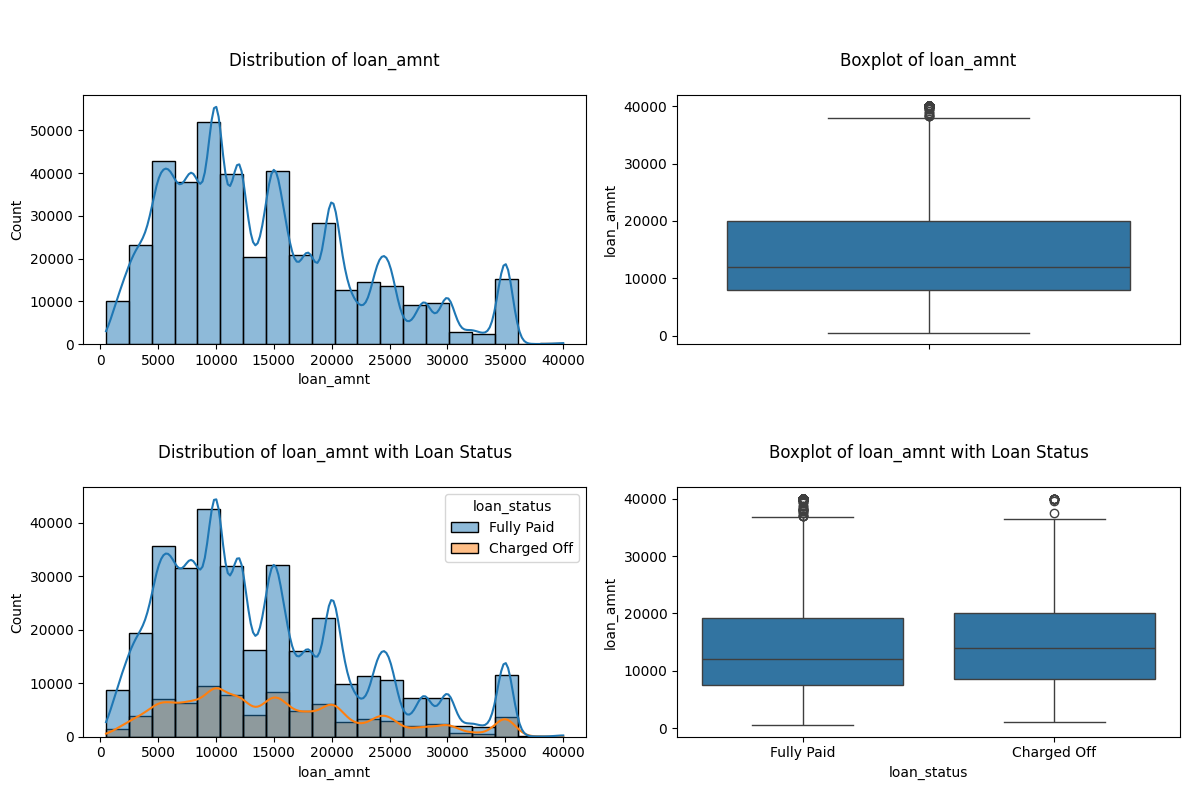

In [ ]:
get_numeric_col_details('loan_amnt',(12,8),20)

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77586.0  15129.196956  8506.080998  1000.0  8525.0  14000.0   
Fully Paid   317909.0  13873.457499  8303.187181   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19275.0  40000.0

In [ ]:
df['loan_amnt']=np.clip(df['loan_amnt'],0,np.percentile(df['loan_amnt'],q=99))

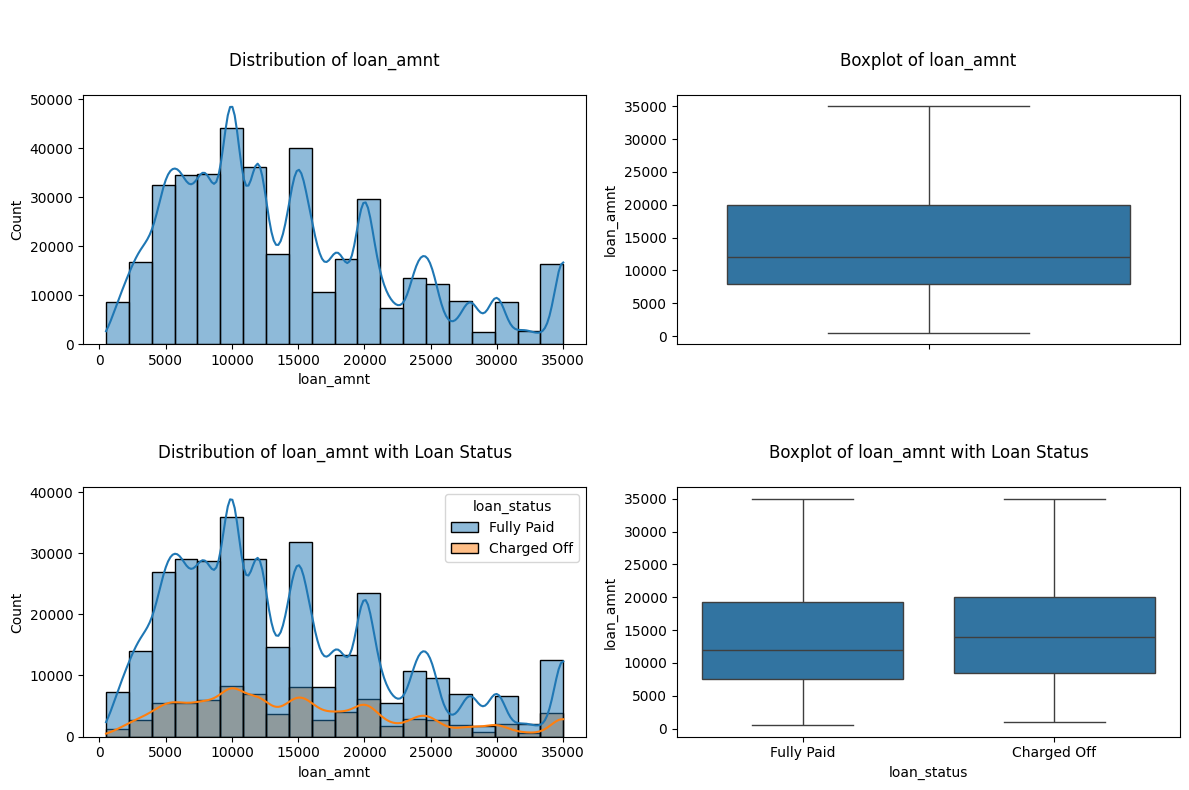

In [ ]:
get_numeric_col_details('loan_amnt',(12,8),20)

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()


count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77586.0  15128.536721  8504.361994  1000.0  8525.0  14000.0   
Fully Paid   317909.0  13870.374856  8294.470767   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  35000.0  
Fully Paid   19275.0  35000.0

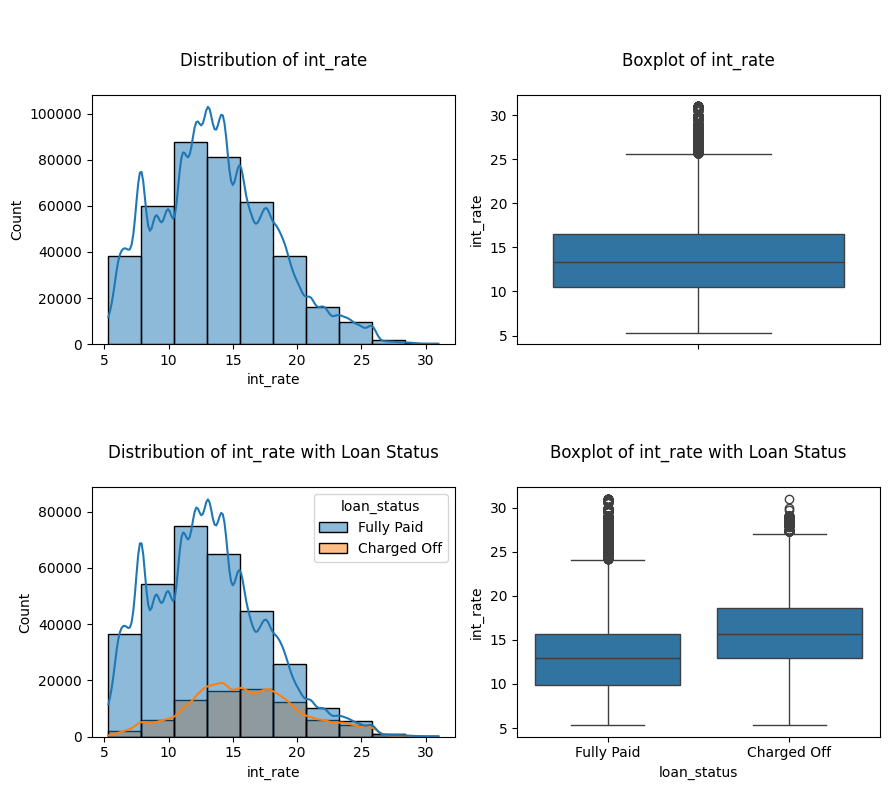

In [ ]:
get_numeric_col_details('int_rate',(9,8),10)

In [ ]:
df.groupby('loan_status')['int_rate'].describe()

count       mean       std   min    25%    50%      75%    max
loan_status                                                                   
Charged Off   77586.0  15.887255  4.387857  5.32  12.99  15.61  18.6625  30.99
Fully Paid   317909.0  13.095947  4.320224  5.32   9.91  12.99  15.6100  30.99

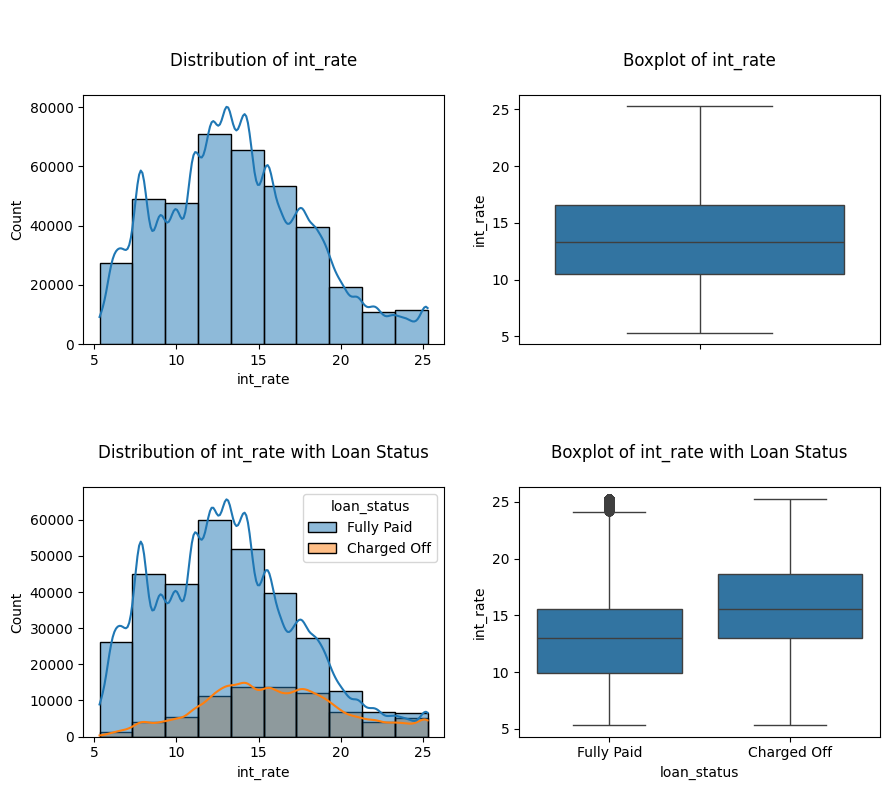

In [ ]:
df['int_rate']=np.clip(df['int_rate'],0,np.percentile(df['int_rate'],q=99))
get_numeric_col_details('int_rate',(9,8),10)

In [ ]:
df.groupby('loan_status')['int_rate'].describe()

count       mean       std   min    25%    50%      75%    max
loan_status                                                                   
Charged Off   77586.0  15.864836  4.334789  5.32  12.99  15.61  18.6625  25.28
Fully Paid   317909.0  13.088495  4.297122  5.32   9.91  12.99  15.6100  25.28

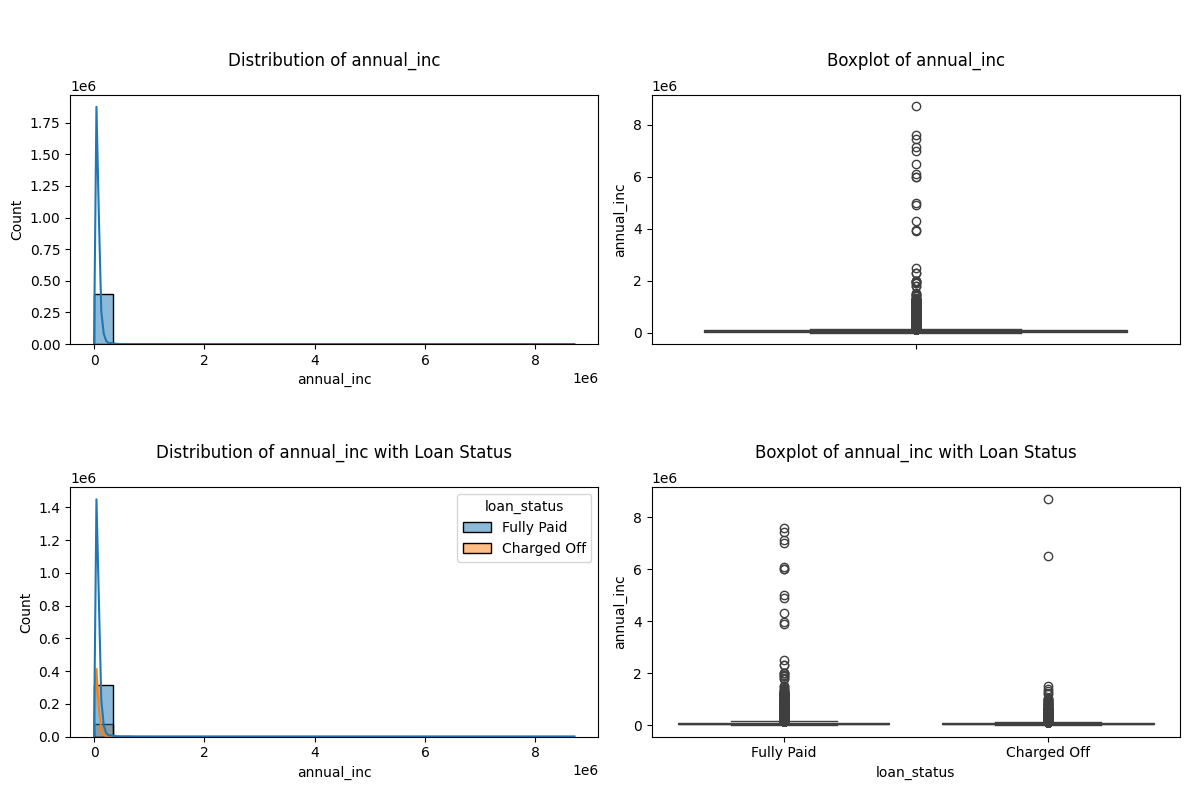

In [ ]:
get_numeric_col_details('annual_inc',(12,8),25)

In [ ]:
df.groupby('loan_status')['annual_inc'].describe()

count          mean           std    min      25%      50%  \
loan_status                                                                  
Charged Off   77586.0  67536.337264  58323.338501    0.0  42000.0  59000.0   
Fully Paid   317909.0  75836.539422  62229.957965  600.0  46156.0  65000.0   

                 75%        max  
loan_status                      
Charged Off  80000.0  8706582.0  
Fully Paid   90000.0  7600000.0

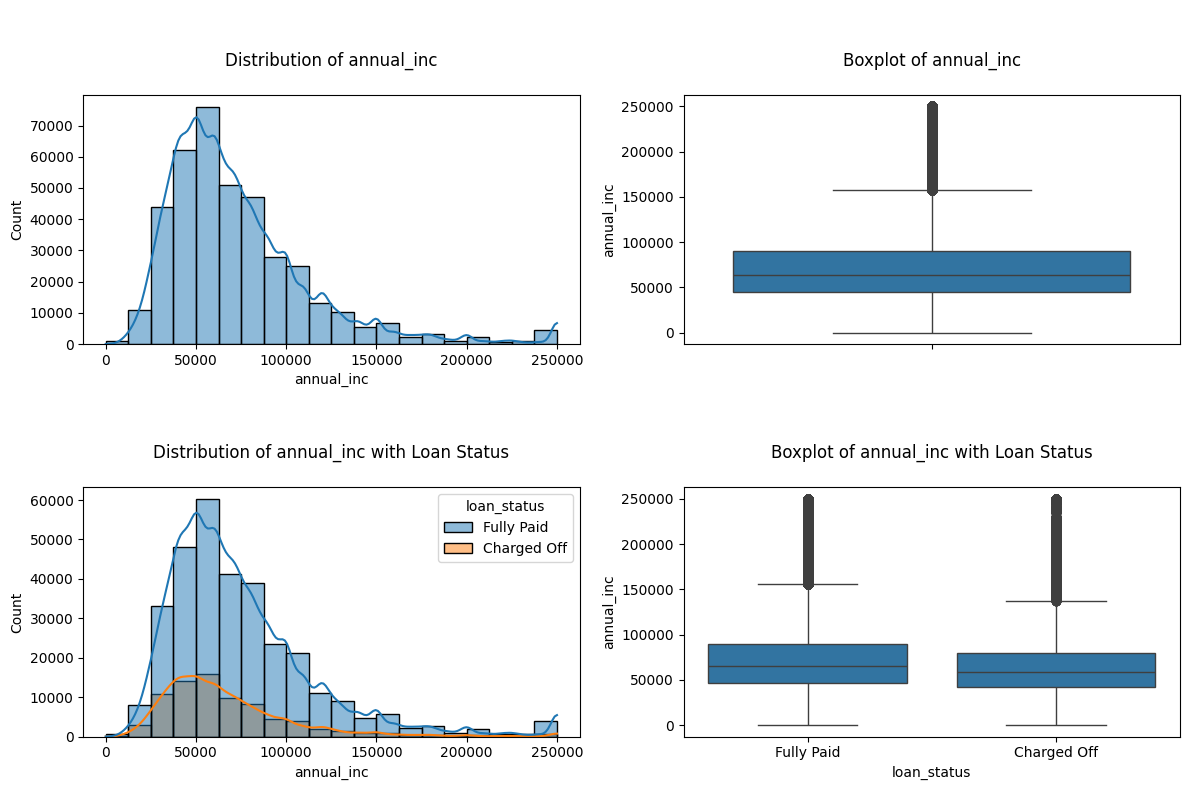

In [ ]:
df['annual_inc']=np.clip(df['annual_inc'],0,np.percentile(df['annual_inc'],q=99))
get_numeric_col_details('annual_inc',(12,8),20)


In [ ]:
df.groupby('loan_status')['annual_inc'].describe()

count          mean           std    min      25%      50%  \
loan_status                                                                  
Charged Off   77586.0  66633.053721  37271.143891    0.0  42000.0  59000.0   
Fully Paid   317909.0  74446.632275  41086.266160  600.0  46156.0  65000.0   

                 75%       max  
loan_status                     
Charged Off  80000.0  250000.0  
Fully Paid   90000.0  250000.0

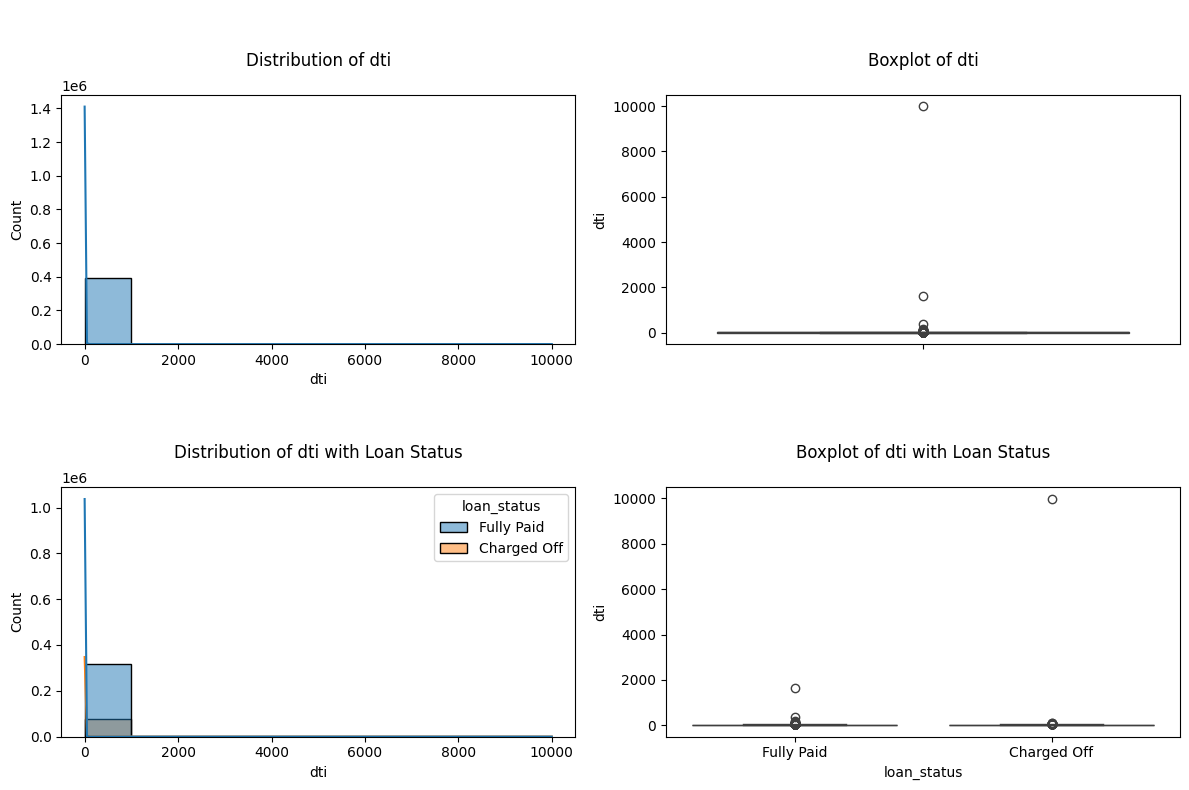

In [ ]:
get_numeric_col_details('dti',(12,8),10)

In [ ]:
df.groupby('loan_status')['dti'].describe()

count       mean        std  min    25%    50%    75%     max
loan_status                                                                  
Charged Off   77586.0  19.664630  36.800167  0.0  13.34  19.34  25.56  9999.0
Fully Paid   317909.0  16.833037   8.499822  0.0  10.88  16.35  22.30  1622.0

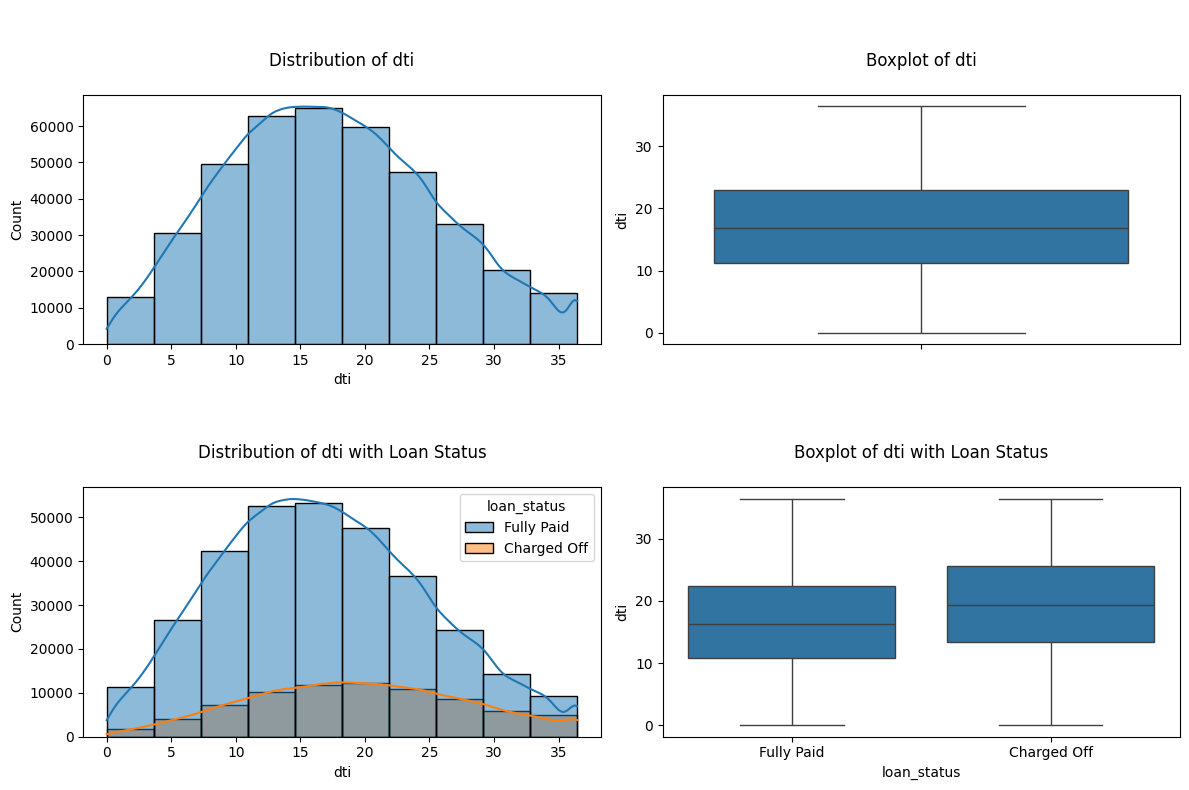

In [ ]:
df['dti']=np.clip(df['dti'],0,np.percentile(df['dti'],q=99))
get_numeric_col_details('dti',(12,8),10)

In [ ]:
df.groupby('loan_status')['dti'].describe()


count       mean       std  min    25%    50%    75%    max
loan_status                                                                
Charged Off   77586.0  19.492731  8.301926  0.0  13.34  19.34  25.56  36.44
Fully Paid   317909.0  16.808541  7.919481  0.0  10.88  16.35  22.30  36.44

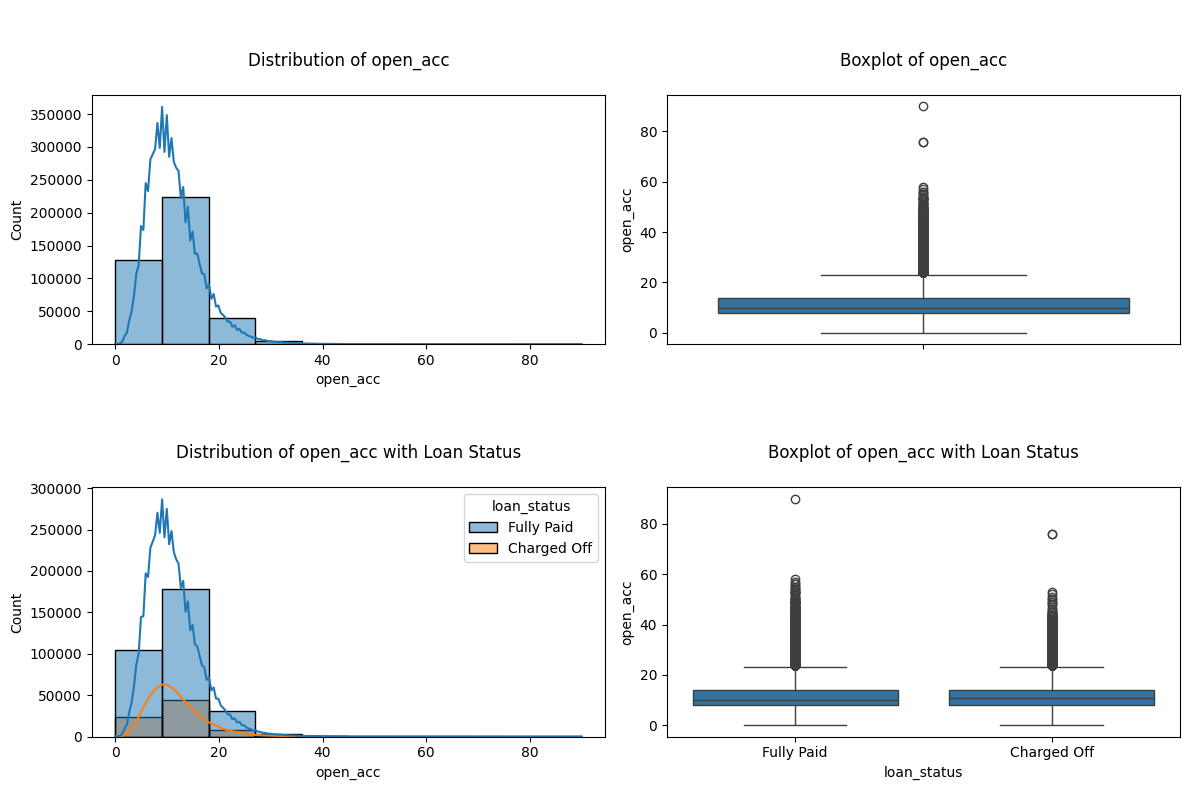

In [ ]:
get_numeric_col_details('open_acc',(12,8),10)

In [ ]:
df.groupby('loan_status')['open_acc'].describe()


count       mean       std  min  25%   50%   75%   max
loan_status                                                           
Charged Off   77586.0  11.604774  5.287646  0.0  8.0  11.0  14.0  76.0
Fully Paid   317909.0  11.242730  5.096870  0.0  8.0  10.0  14.0  90.0

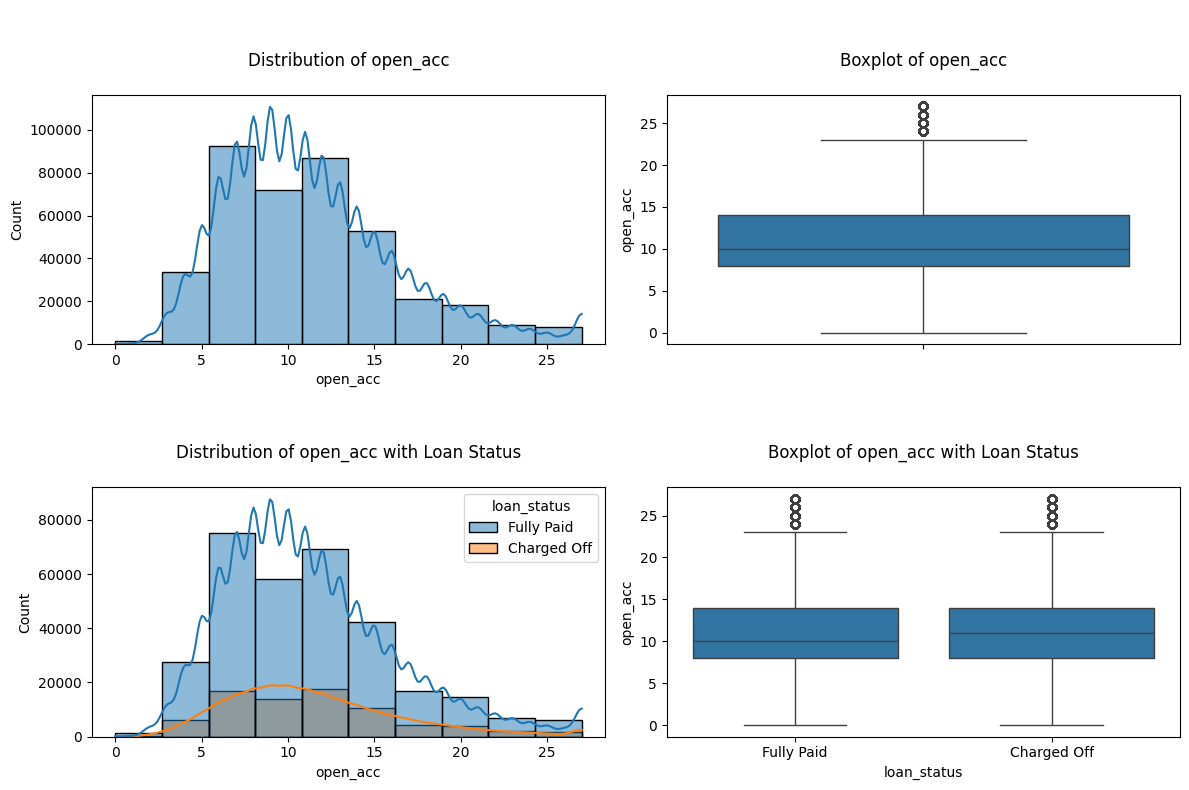

In [ ]:
df['open_acc']=np.clip(df['open_acc'],0,np.percentile(df['open_acc'],q=99))
get_numeric_col_details('open_acc',(12,8),10)

In [ ]:
df.groupby('loan_status')['open_acc'].describe()

count       mean       std  min  25%   50%   75%   max
loan_status                                                           
Charged Off   77586.0  11.543165  5.046242  0.0  8.0  11.0  14.0  27.0
Fully Paid   317909.0  11.197730  4.913930  0.0  8.0  10.0  14.0  27.0

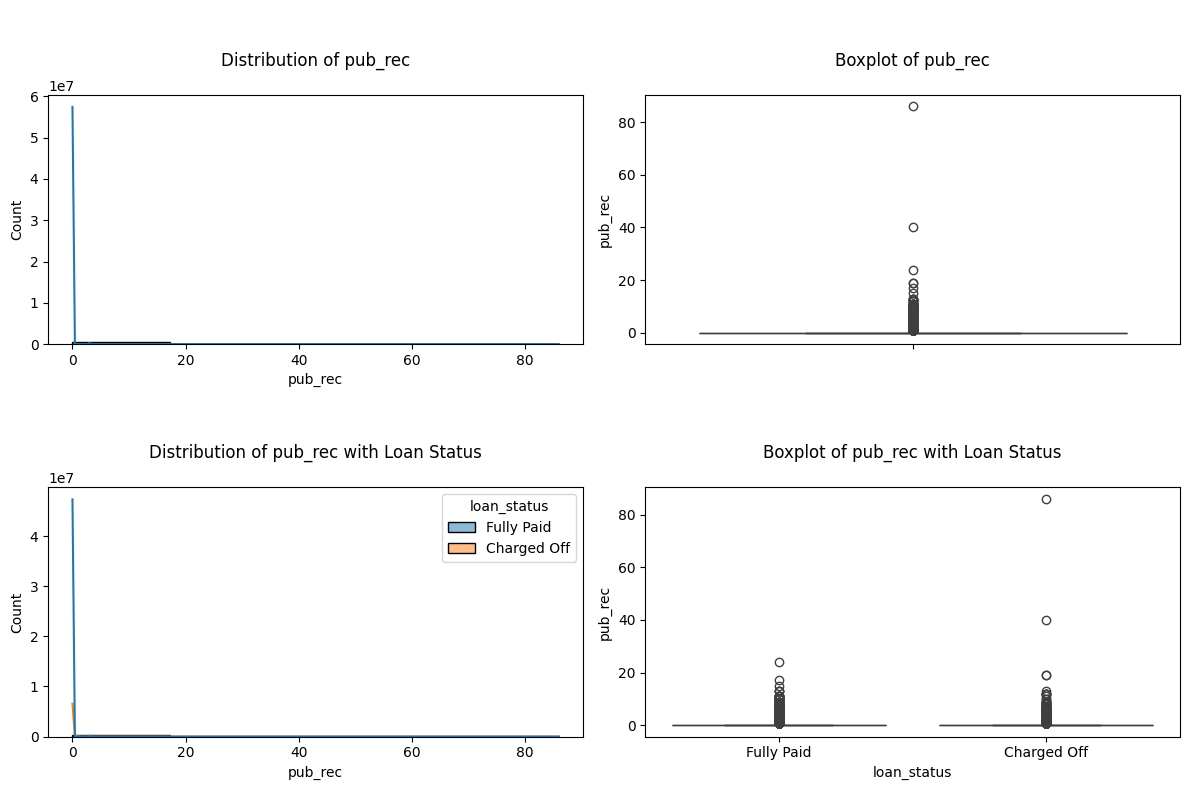

In [ ]:
get_numeric_col_details('pub_rec',(12,8),5)

In [ ]:
df.groupby('loan_status')['pub_rec'].describe()

count      mean       std  min  25%  50%  75%   max
loan_status                                                        
Charged Off   77586.0  0.199753  0.648576  0.0  0.0  0.0  0.0  86.0
Fully Paid   317909.0  0.173169  0.497912  0.0  0.0  0.0  0.0  24.0

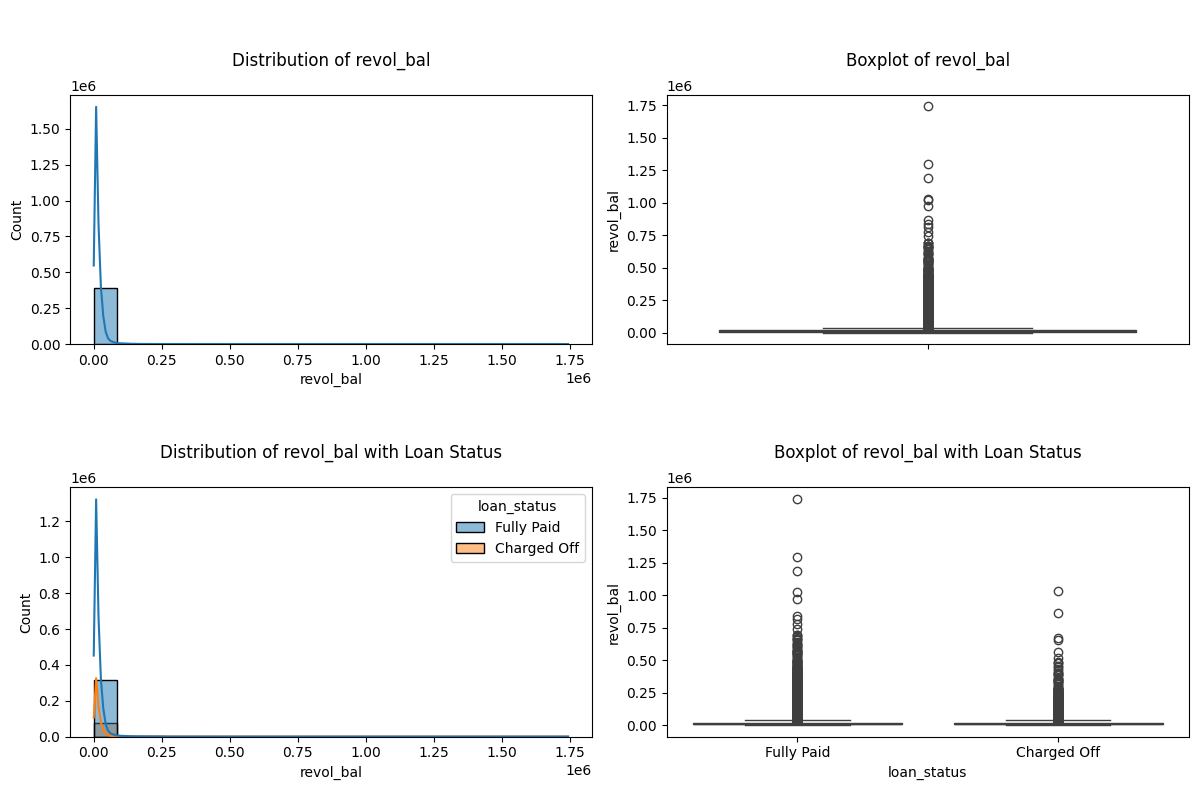

In [ ]:
get_numeric_col_details('revol_bal',(12,8),20)

In [ ]:
df.groupby('loan_status')['revol_bal'].describe()


count          mean           std  min      25%      50%  \
loan_status                                                                
Charged Off   77586.0  15392.782783  18207.615940  0.0  6154.25  11280.0   
Fully Paid   317909.0  15958.220947  21134.010724  0.0  5996.00  11161.0   

                 75%        max  
loan_status                      
Charged Off  19481.0  1030826.0  
Fully Paid   19660.0  1743266.0

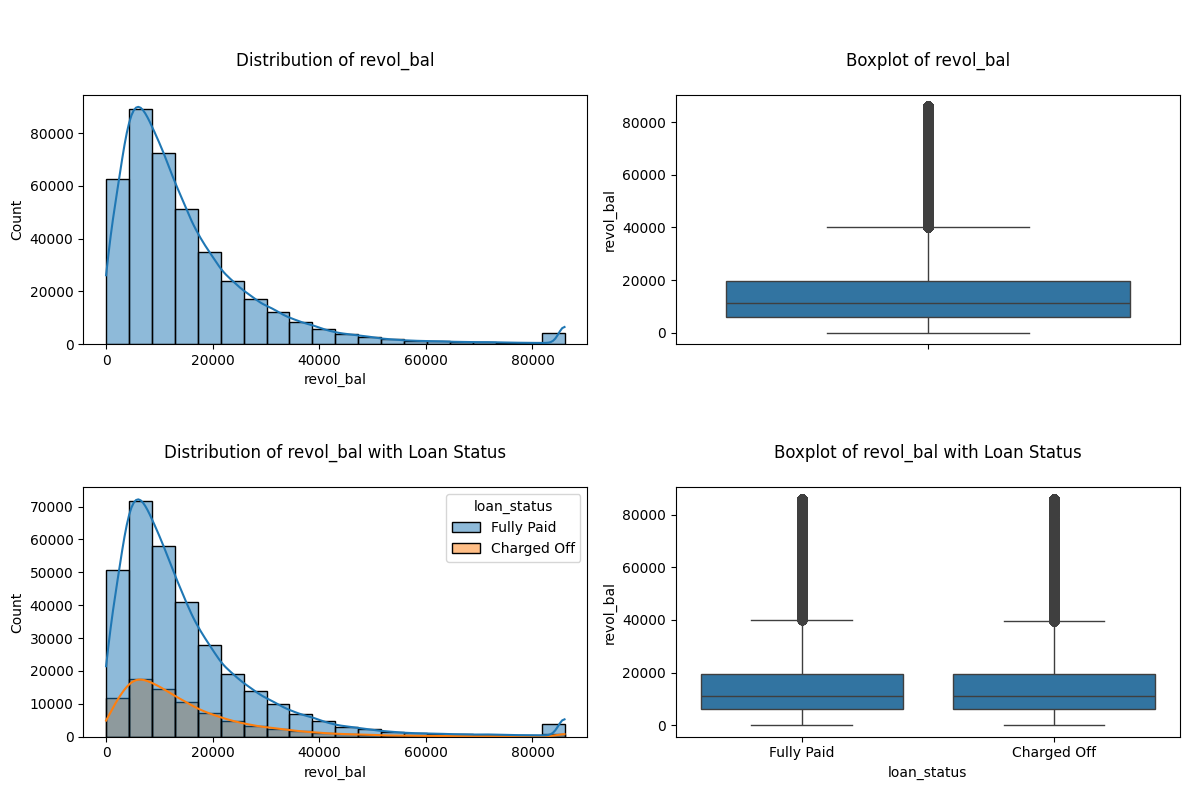

In [ ]:
df['revol_bal']=np.clip(df['revol_bal'],0,np.percentile(df['revol_bal'],q=99))
get_numeric_col_details('revol_bal',(12,8),20)

In [ ]:
df.groupby('loan_status')['revol_bal'].describe()

count          mean           std  min      25%      50%  \
loan_status                                                                
Charged Off   77586.0  14942.030368  13356.679160  0.0  6154.25  11280.0   
Fully Paid   317909.0  15248.504804  14336.236467  0.0  5996.00  11161.0   

                 75%       max  
loan_status                     
Charged Off  19481.0  86017.18  
Fully Paid   19660.0  86017.18

In [ ]:
print('rows before dropping missing values:',df.shape[0])
df=df.dropna(subset=['revol_util'])
print('rows after dropping missing values:',df.shape[0])

rows before dropping missing values: 395495
rows after dropping missing values: 395219


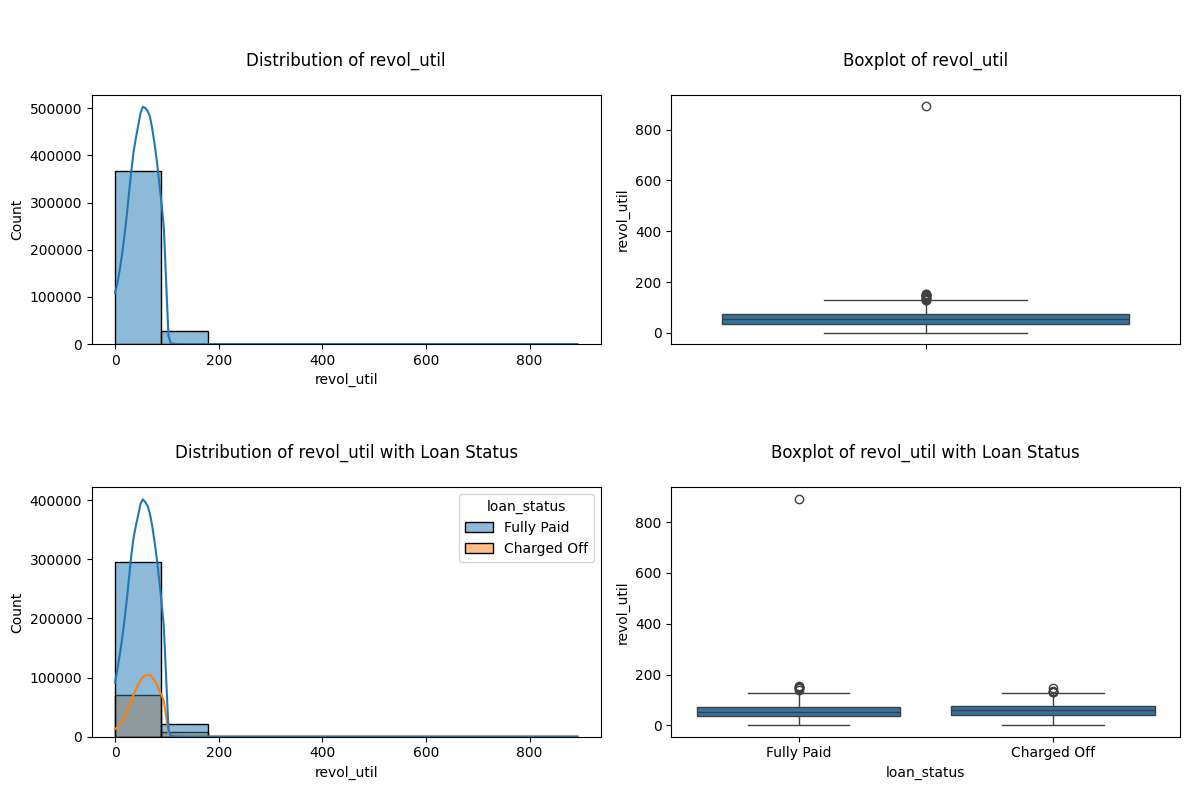

In [ ]:
get_numeric_col_details('revol_util',(12,8),10)

In [ ]:
df.groupby('loan_status')['revol_util'].describe()

count       mean        std  min   25%   50%   75%    max
loan_status                                                              
Charged Off   77523.0  57.880446  23.482403  0.0  41.3  59.3  76.2  148.0
Fully Paid   317696.0  52.815207  24.565954  0.0  34.6  53.7  72.0  892.3

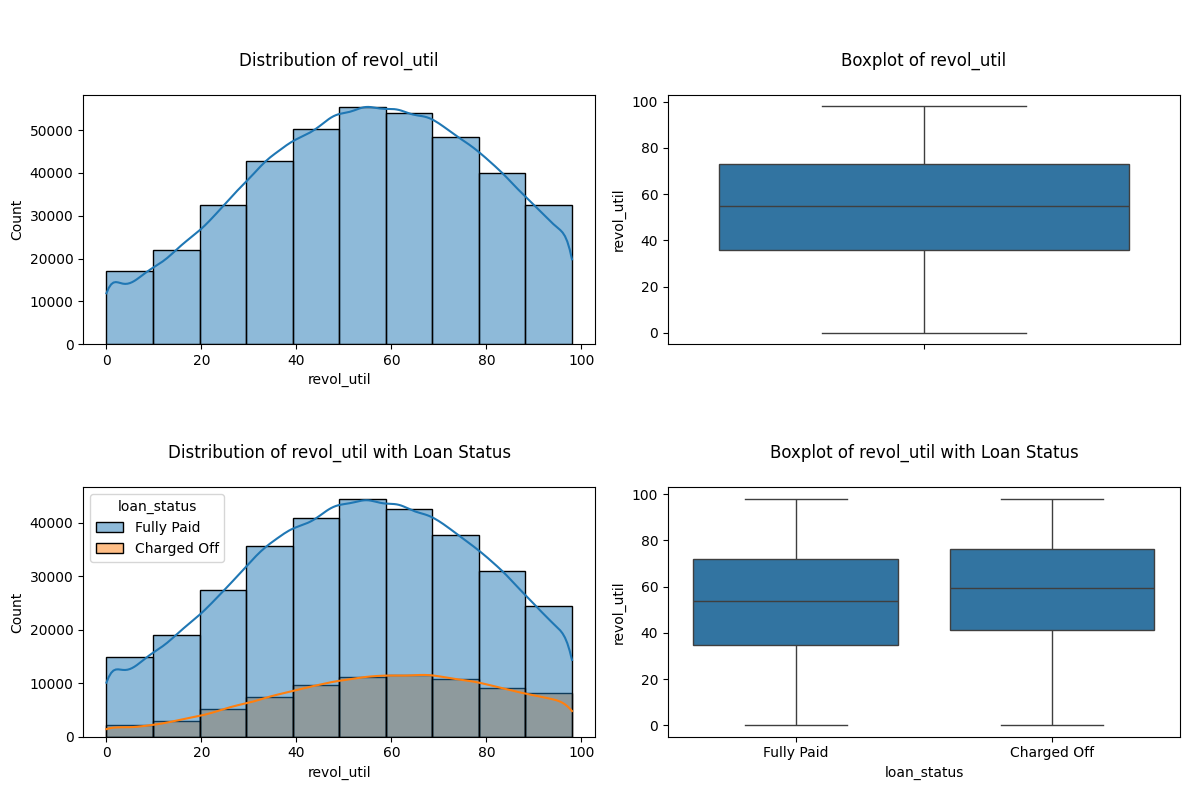

In [ ]:
df['revol_util']=np.clip(df['revol_util'],0,np.percentile(df['revol_util'],q=99))
get_numeric_col_details('revol_util',(12,8),10)

In [ ]:
df.groupby('loan_status')['revol_util'].describe()

count       mean        std  min   25%   50%   75%   max
loan_status                                                             
Charged Off   77523.0  57.847111  23.419300  0.0  41.3  59.3  76.2  98.0
Fully Paid   317696.0  52.793899  24.483083  0.0  34.6  53.7  72.0  98.0

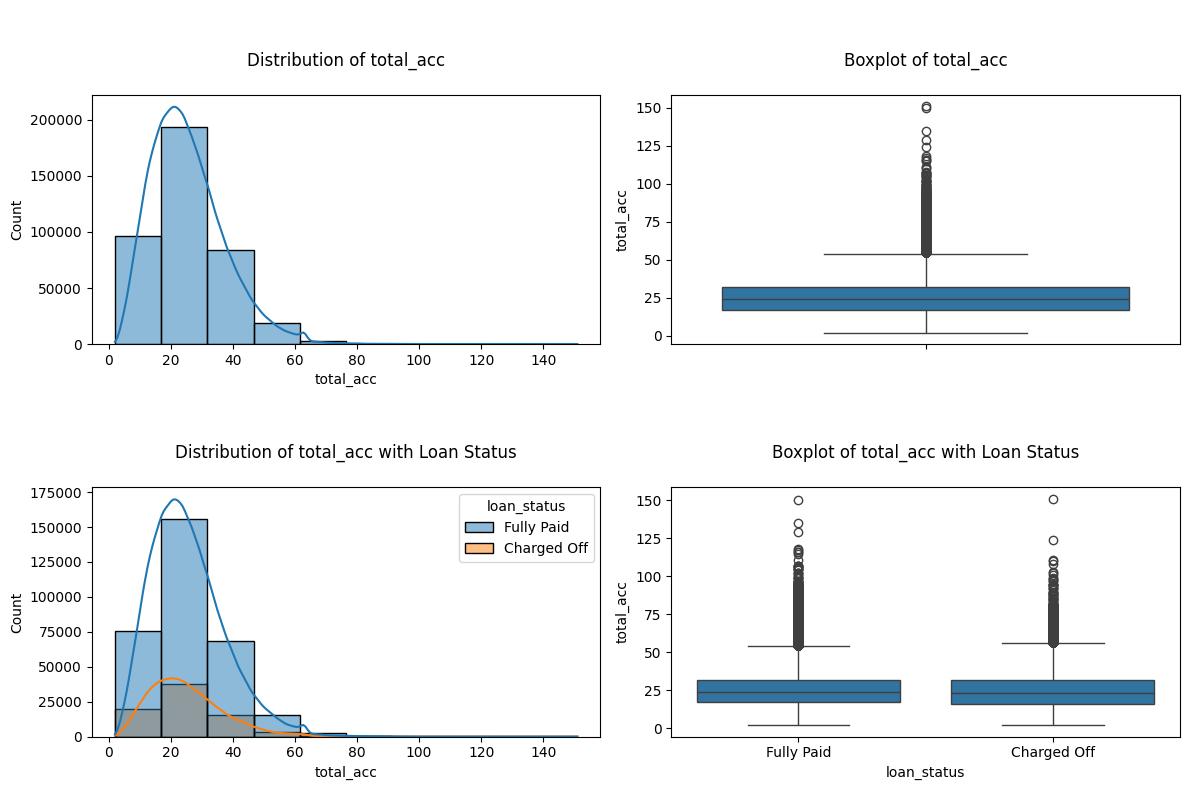

In [ ]:
get_numeric_col_details('total_acc',(12,8),10)

In [ ]:
df.groupby('loan_status')['total_acc'].describe()


count       mean        std  min   25%   50%   75%    max
loan_status                                                              
Charged Off   77523.0  24.996982  11.912158  2.0  16.0  23.0  32.0  151.0
Fully Paid   317696.0  25.531316  11.876426  2.0  17.0  24.0  32.0  150.0

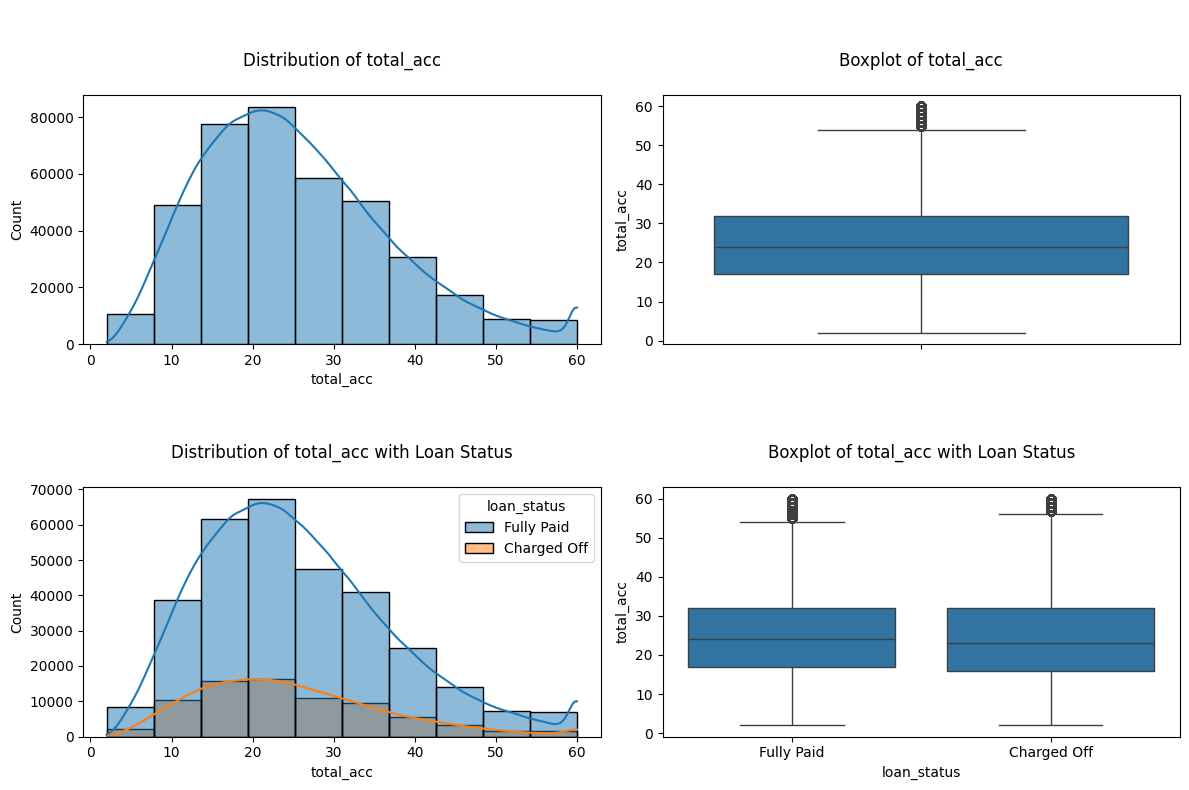

In [ ]:
df['total_acc']=np.clip(df['total_acc'],0,np.percentile(df['total_acc'],q=99))
get_numeric_col_details('total_acc',(12,8),10)

In [ ]:
df.groupby('loan_status')['total_acc'].describe()

count       mean        std  min   25%   50%   75%   max
loan_status                                                             
Charged Off   77523.0  24.925261  11.644764  2.0  16.0  23.0  32.0  60.0
Fully Paid   317696.0  25.463292  11.629859  2.0  17.0  24.0  32.0  60.0

In [ ]:
df.groupby('mort_acc')['loan_status'].value_counts()*100

mort_acc  loan_status
0.0       Fully Paid     10657400
          Charged Off     3313400
1.0       Fully Paid      4826800
          Charged Off     1211600
2.0       Fully Paid      4061500
          Charged Off      929200
3.0       Fully Paid      3149400
          Charged Off      652800
4.0       Fully Paid      2325100
          Charged Off      461400
5.0       Fully Paid      1532500
          Charged Off      285700
6.0       Fully Paid       933900
          Charged Off      172000
7.0       Fully Paid       515300
          Charged Off       89700
8.0       Fully Paid       267700
          Charged Off       44300
9.0       Fully Paid       144400
          Charged Off       20900
10.0      Fully Paid        75200
          Charged Off       11100
11.0      Fully Paid        42200
          Charged Off        5700
12.0      Fully Paid        22700
          Charged Off        3700
13.0      Fully Paid        12900
          Charged Off        1700
14.0      Fully Paid         9800
          Charged Off         900
15.0      Fully Paid         5000
          Charged Off        1100
16.0      Fully Paid         2700
          Charged Off        1000
17.0      Fully Paid         1900
          Charged Off         300
18.0      Fully Paid         1600
          Charged Off         200
19.0      Fully Paid         1000
          Charged Off         500
20.0      Fully Paid         1000
          Charged Off         300
21.0      Fully Paid          300
          Charged Off         100
22.0      Fully Paid          600
          Charged Off         100
23.0      Charged Off         100
          Fully Paid          100
24.0      Fully Paid         1000
25.0      Fully Paid          400
26.0      Fully Paid          200
27.0      Fully Paid          300
28.0      Fully Paid          100
30.0      Fully Paid          100
31.0      Fully Paid          200
32.0      Fully Paid          200
34.0      Fully Paid          100
Name: count, dtype: int64

In [ ]:
total_acc_avg = df.groupby("total_acc")["mort_acc"].median()
df['mort_acc']=df['mort_acc'].fillna(df['total_acc'].map(total_acc_avg))

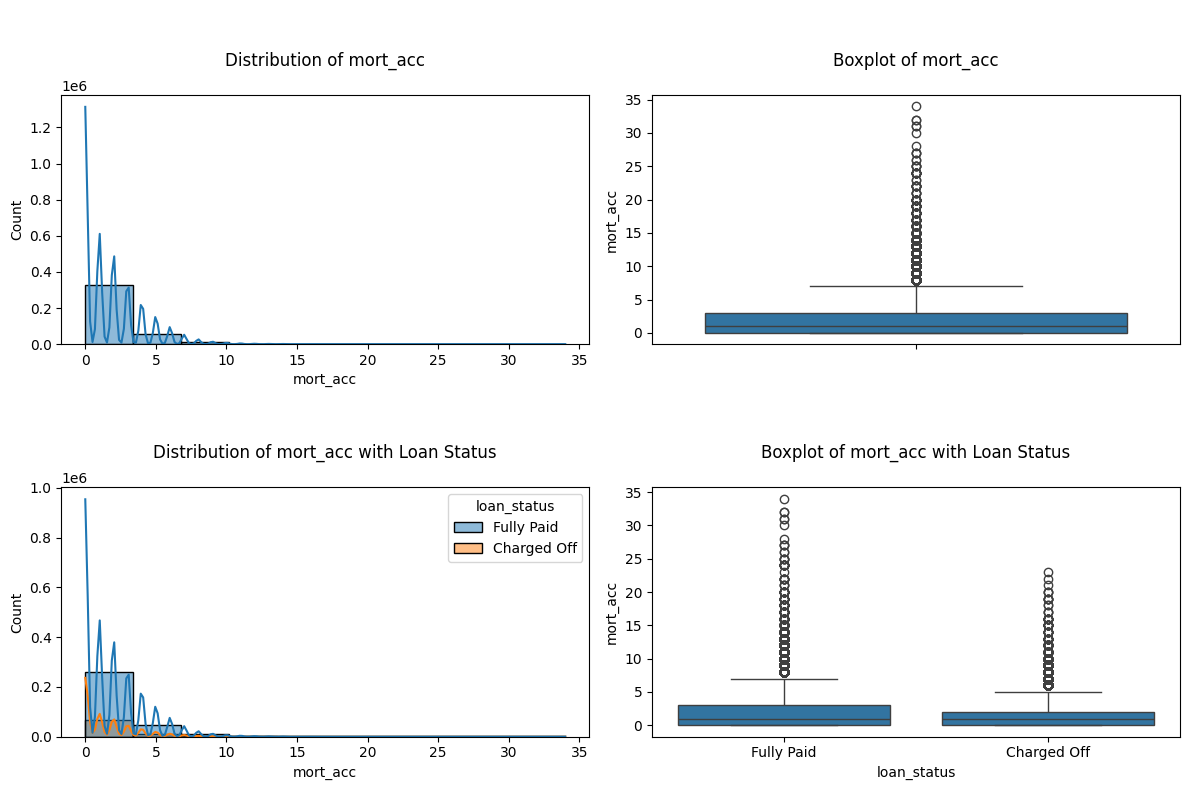

In [ ]:
get_numeric_col_details('mort_acc',(12,8),10)

In [ ]:
df.groupby('loan_status')['mort_acc'].describe()

count      mean       std  min  25%  50%  75%   max
loan_status                                                        
Charged Off   77523.0  1.466158  1.924901  0.0  0.0  1.0  2.0  23.0
Fully Paid   317696.0  1.810064  2.107011  0.0  0.0  1.0  3.0  34.0

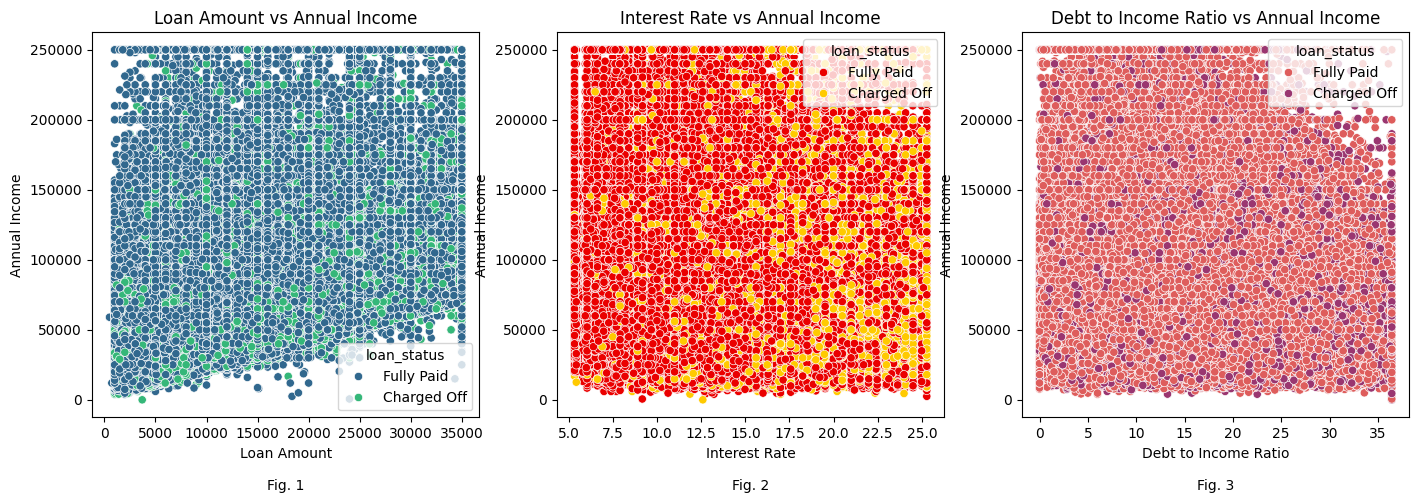

In [ ]:
# Check the distribution of data for the numerical columns -> 'Annual Income vs Loan Amount', 'Annual Income vs Interest Rate'

plt.figure(figsize=(17,5))

x_col = ['loan_amnt', 'int_rate', 'dti']
x_lab = ['Loan Amount', 'Interest Rate', 'Debt to Income Ratio']
pal = ['viridis', 'hot', 'flare']

# Create subplots for the columns in consideration
for i in range(len(x_col)):
    plt.subplot(1, len(x_col), i+1)

    # Plot scatterplot using Seaborn
    sns.scatterplot(x = df[x_col[i]], y = df['annual_inc'], hue=df['loan_status'], palette=pal[i])

    # Add labels and title
    plt.xlabel(f"{x_lab[i]}\n\nFig. {i+1}")
    plt.ylabel('Annual Income')
    plt.title(f'{x_lab[i]} vs Annual Income')


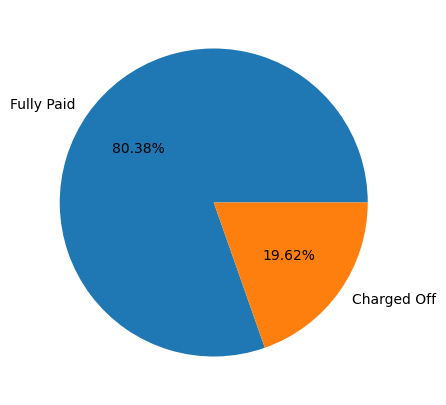

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df['loan_status'].value_counts().values ,autopct='%1.2f%%',labels=df['loan_status'].value_counts().index)
plt.show()

In [ ]:
df['loan_status'].describe()

count         395219
unique             2
top       Fully Paid
freq          317696
Name: loan_status, dtype: object

 We have assumed

  * H_0 : loan_status is independent of considered feature.
  * H_1 : loan_status is dependent upon considered feature.

Level of significance is assumed to be 0.05.

In [ ]:
contingency_table = pd.crosstab(index= df["initial_list_status"],columns= df["loan_status"])
print(contingency_table)
probability = chi2_contingency(contingency_table)
print(f"\nThe P value is :{probability.pvalue.round(4)}")
pval=probability.pvalue
if pval<0.05:
  print('\nWe can reject the null hypothesis which states that loan_status is dependent on initial_list_status')
else:
  print("\nWe can't reject the null hypothesis which states that loan_status is independent of initial_list_status")

loan_status          Charged Off  Fully Paid
initial_list_status                         
f                          45827      191519
w                          31696      126177

The P value is :0.0

We can reject the null hypothesis which states that loan_status is dependent on initial_list_status


In [ ]:
contingency_table = pd.crosstab(index= df["verification_status"],columns= df["loan_status"])
print(contingency_table)
probability = chi2_contingency(contingency_table)
print(f"\nThe P value is :{probability.pvalue.round(4)}")
pval=probability.pvalue
if pval<0.05:
  print('\nWe can reject the null hypothesis which states that loan_status is dependent on verification_status')
else:
  print("\nWe can't reject the null hypothesis which states that loan_status is independent of verification_status")

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified               18203      106264
Source Verified            28198      103103
Verified                   31122      108329

The P value is :0.0

We can reject the null hypothesis which states that loan_status is dependent on verification_status


In [ ]:
contingency_table = pd.crosstab(index= df["home_ownership"],columns= df["loan_status"])
print(contingency_table)
probability = chi2_contingency(contingency_table)
print(f"\nThe P value is :{probability.pvalue.round(4)}")
pval=probability.pvalue
if pval<0.05:
  print('\nWe can reject the null hypothesis which states that loan_status is dependent on home_ownership')
else:
  print("\nWe can't reject the null hypothesis which states that loan_status is independent of home_ownership")

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE              33579      164443
OTHER                    23         119
OWN                    7786       29874
RENT                  36135      123260

The P value is :0.0

We can reject the null hypothesis which states that loan_status is dependent on home_ownership


In [ ]:
contingency_table = pd.crosstab(index= df["emp_length_in_years"],columns= df["loan_status"])
print(contingency_table)
probability = chi2_contingency(contingency_table)
print(f"\nThe P value is :{probability.pvalue.round(4)}")
pval=probability.pvalue
if pval<0.05:
  print('\nWe can reject the null hypothesis which states that loan_status is dependent on emp_length')
else:
  print("\nWe can't reject the null hypothesis which states that loan_status is independent of emp_length")

loan_status          Charged Off  Fully Paid
emp_length_in_years                         
0.50                        6532       25032
1.00                        5135       20650
2.00                        6910       28831
3.00                        6176       25422
4.00                        4593       19310
5.00                        5086       21369
5.88                        5034           0
6.00                        3939       30120
7.00                        4049       16734
8.00                        3820       15311
9.00                        3066       12224
10.00                      23183      102693

The P value is :0.0

We can reject the null hypothesis which states that loan_status is dependent on emp_length


In [ ]:
contingency_table = pd.crosstab(index= df["grade"],columns= df["loan_status"])
print(contingency_table)
probability = chi2_contingency(contingency_table)
print(f"\nThe P value is :{probability.pvalue.round(4)}")
pval=probability.pvalue
if pval<0.05:
  print('\nWe can reject the null hypothesis which states that loan_status is dependent on grade')
else:
  print("\nWe can't reject the null hypothesis which states that loan_status is independent of grade")


loan_status  Charged Off  Fully Paid
grade                               
A                   4031       60025
B                  14560      101252
C                  22410       83365
D                  18296       45068
E                  11746       19681
F                   5023        6717
G                   1457        1588

The P value is :0.0

We can reject the null hypothesis which states that loan_status is dependent on grade


In [ ]:
contingency_table = pd.crosstab(index= df["application_type"],columns= df["loan_status"])
print(contingency_table)
probability = chi2_contingency(contingency_table)
print(f"\nThe P value is :{probability.pvalue.round(4)}")
pval=probability.pvalue
if pval<0.05:
  print('\nWe can reject the null hypothesis which states that loan_status is dependent on application_type')
else:
  print("\nWe can't reject the null hypothesis which states that loan_status is independent of application_type")


loan_status       Charged Off  Fully Paid
application_type                         
DIRECT_PAY                102         184
INDIVIDUAL              77367      317141
JOINT                      54         371

The P value is :0.0

We can reject the null hypothesis which states that loan_status is dependent on application_type


In [ ]:
contingency_table = pd.crosstab(index= df["state"],columns= df["loan_status"])
probability = chi2_contingency(contingency_table)
print(f"\nThe P value is :{probability.pvalue.round(4)}")
pval=probability.pvalue
if pval<0.05:
  print('\nWe can reject the null hypothesis which states that loan_status is dependent on state')
else:
  print("\nWe can't reject the null hypothesis which states that loan_status is independent of state")


The P value is :0.6394

We can't reject the null hypothesis which states that loan_status is independent of state


In [ ]:
contingency_table = pd.crosstab(index= df["term_in_month"],columns= df["loan_status"])
print(contingency_table)
probability = chi2_contingency(contingency_table)
print(f"\nThe P value is :{probability.pvalue.round(4)}")
pval=probability.pvalue
if pval<0.05:
  print('\nWe can reject the null hypothesis which states that loan_status is dependent on term')
else:
  print("\nWe can't reject the null hypothesis which states that loan_status is independent of term")

loan_status    Charged Off  Fully Paid
term_in_month                         
36                   47507      253740
60                   30016       63956

The P value is :0.0

We can reject the null hypothesis which states that loan_status is dependent on term


In [ ]:
contingency_table = pd.crosstab(index= df["add_code"],columns= df["loan_status"])
print(contingency_table)
probability = chi2_contingency(contingency_table)
print(f"\nThe P value is :{probability.pvalue.round(4)}")
pval=probability.pvalue
if pval<0.05:
  print('\nWe can reject the null hypothesis which states that loan_status is dependent on add_code')
else:
  print("\nWe can't reject the null hypothesis which states that loan_status is independent of add_code")

loan_status  Charged Off  Fully Paid
add_code                            
813                    0       45725
5113                   0       45300
11650              11210           0
22690              10932       45481
29597                  0       45393
30723              10998       45404
48052              11170       44641
70466              11128       45752
86630              10959           0
93700              11126           0

The P value is :0.0

We can reject the null hypothesis which states that loan_status is dependent on add_code


* We will be dropping "state" feature as corresponding p_value >>0.05

In [ ]:
df['pub_rec']=np.where(df['pub_rec']>0,1,0)
df['pub_rec_bankruptcies']=np.where(df['pub_rec_bankruptcies']>0,1,0)
df['mort_acc']=np.where(df['mort_acc']>0,1,0)

In [ ]:
df_pivot=df.pivot(columns='grade',values='sub_grade')
for col in df_pivot:
  df_pivot[col]=df_pivot[col].str[-1]
  df_pivot[col]=df_pivot[col].fillna(0)
  df_pivot[col]=df_pivot[col].astype('int')

df_pivot

grade   A  B  C  D  E  F  G
0       0  4  0  0  0  0  0
1       0  5  0  0  0  0  0
2       0  3  0  0  0  0  0
3       2  0  0  0  0  0  0
4       0  0  5  0  0  0  0
...    .. .. .. .. .. .. ..
396025  0  4  0  0  0  0  0
396026  0  0  1  0  0  0  0
396027  0  1  0  0  0  0  0
396028  0  0  2  0  0  0  0
396029  0  0  2  0  0  0  0

[395219 rows x 7 columns]

In [ ]:
data=df.join(df_pivot)
data.head()

loan_amnt  term_in_month  int_rate grade sub_grade  \
0      10000             36     11.44     B        B4   
1       8000             36     11.99     B        B5   
2      15600             36     10.49     B        B3   
3       7200             36      6.49     A        A2   
4      24375             60     17.27     C        C5   

                 emp_title home_ownership  annual_inc verification_status  \
0                marketing           RENT      117000        Not Verified   
1          credit analyst        MORTGAGE       65000        Not Verified   
2             statistician           RENT       43057     Source Verified   
3          client advocate           RENT       54000        Not Verified   
4  destiny management inc.       MORTGAGE       55000            Verified   

   loan_status             purpose    dti  open_acc  pub_rec  revol_bal  \
0   Fully Paid            vacation  26.24        16        0    36369.0   
1   Fully Paid  debt_consolidation  22.05        17        0    20131.0   
2   Fully Paid         credit_card  12.79        13        0    11987.0   
3   Fully Paid         credit_card   2.60         6        0     5472.0   
4  Charged Off         credit_card  33.95        13        0    24584.0   

   revol_util  total_acc initial_list_status application_type  mort_acc  \
0        41.8         25                   w       INDIVIDUAL         0   
1        53.3         27                   f       INDIVIDUAL         1   
2        92.2         26                   f       INDIVIDUAL         0   
3        21.5         13                   f       INDIVIDUAL         0   
4        69.8         43                   f       INDIVIDUAL         1   

   pub_rec_bankruptcies  emp_length_in_years  issue_year  issue_month  \
0                     0                 10.0        2015            1   
1                     0                  4.0        2015            1   
2                     0                  0.5        2015            1   
3                     0                  6.0        2014           11   
4                     0                  9.0        2013            4   

   earliest_cr_line_year  earliest_cr_line_month  add_code state  A  B  C  D  \
0                   1990                       6     22690    OK  0  4  0  0   
1                   2004                       7      5113    SD  0  5  0  0   
2                   2007                       8      5113    WV  0  3  0  0   
3                   2006                       9       813    MA  2  0  0  0   
4                   1999                       3     11650    VA  0  0  5  0   

   E  F  G  
0  0  0  0  
1  0  0  0  
2  0  0  0  
3  0  0  0  
4  0  0  0

In [ ]:
data.drop(columns=['grade','sub_grade','earliest_cr_line_year','issue_year','state'],inplace=True)

In [ ]:
data['verification_status']=np.where(data['verification_status']=='Not Verified',0,1)
data['initial_list_status']=np.where(data['initial_list_status']=='f',1,0)
data['loan_status']=np.where(data['loan_status']=='Fully Paid',0,1)

data=pd.get_dummies(data,columns=['home_ownership','purpose','add_code'],drop_first=True)

le=LabelEncoder()
le.fit_transform(data['application_type'])
data['application_type']=le.transform(data['application_type'])
data['emp_title']=le.fit_transform(data['emp_title'])

In [ ]:
X=data.drop(columns=['loan_status'])
y=data['loan_status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

std_scl=StandardScaler()
X_train=pd.DataFrame(std_scl.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(std_scl.transform(X_test),columns=X.columns)

In [ ]:
knn=KNNImputer()
X_train=pd.DataFrame(knn.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(knn.transform(X_test),columns=X.columns)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

#Model Evaluation
print(f"The accuracy for Training data is {model.score(X_train,y_train)}")
print(f"The accuracy for Testing data is {model.score(X_test,y_test)}")

print('Test F1 Score:',f1_score(y_test,y_pred).round(2))


print('Test Recall Score:',recall_score(y_test,y_pred).round(2))


print('Test Precision Score:',precision_score(y_test,y_pred).round(2))

The accuracy for Training data is 0.888805250256978
The accuracy for Testing data is 0.8892009513688579
Test F1 Score: 0.62
Test Recall Score: 0.46
Test Precision Score: 0.94


In [ ]:
confusion_matrx = confusion_matrix(y_test, y_pred)
print(confusion_matrx)

[[63145   478]
 [ 8280  7141]]


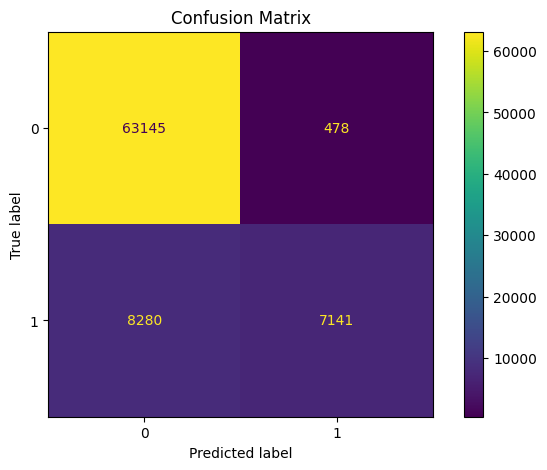

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrx).plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model1=LogisticRegression(class_weight='balanced')
model1.fit(X_train,y_train)
y_pred_cw=model1.predict(X_test)

model1.score(X_test,y_test)

0.797075046809372

In [ ]:
print(classification_report(y_test, y_pred_cw))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     63623
           1       0.49      0.81      0.61     15421

    accuracy                           0.80     79044
   macro avg       0.72      0.80      0.74     79044
weighted avg       0.86      0.80      0.81     79044



The accuracy for Training data is 0.8000885585514351
The accuracy for Testing data is 0.797075046809372
Test F1 Score: 0.61
Test Recall Score: 0.81
Test Precision Score: 0.49
[[50549 13074]
 [ 2966 12455]]


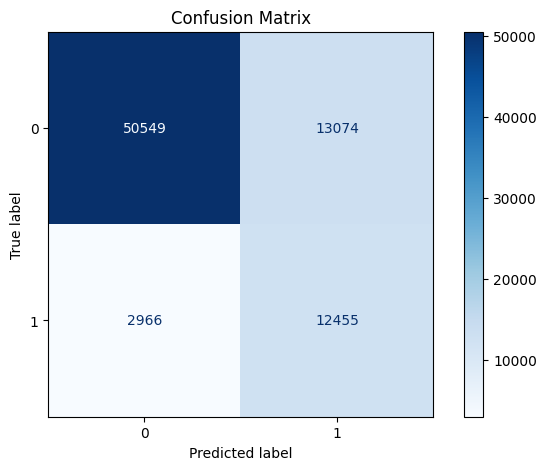

In [ ]:
#Model Evaluation
print(f"The accuracy for Training data is {model1.score(X_train,y_train)}")
print(f"The accuracy for Testing data is {model1.score(X_test,y_test)}")

print('Test F1 Score:',f1_score(y_test,y_pred_cw).round(2))


print('Test Recall Score:',recall_score(y_test,y_pred_cw).round(2))


print('Test Precision Score:',precision_score(y_test,y_pred_cw).round(2))


confusion_matrx = confusion_matrix(y_test, y_pred_cw)
print(confusion_matrx)

fig, ax = plt.subplots(figsize=(8, 5))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrx).plot(ax=ax,cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Oversampling using SMOTE

In [ ]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)
model2=LogisticRegression()
model2.fit(X_train_smote,y_train_smote)

y_pred_smote=model2.predict(X_test)
model2.score(X_test,y_test)

0.795126764839836

In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))

print("\nAfter OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, the shape of train_X: (316175, 51)
After OverSampling, the shape of train_X: (508146, 51)

After OverSampling, counts of label '1': 254073
After OverSampling, counts of label '0': 254073


The accuracy for Training data is 0.798782319917767
The accuracy for Testing data is 0.795126764839836
Test F1 Score: 0.61
Test Recall Score: 0.81
Test Precision Score: 0.48
[[50385 13238]
 [ 2956 12465]]


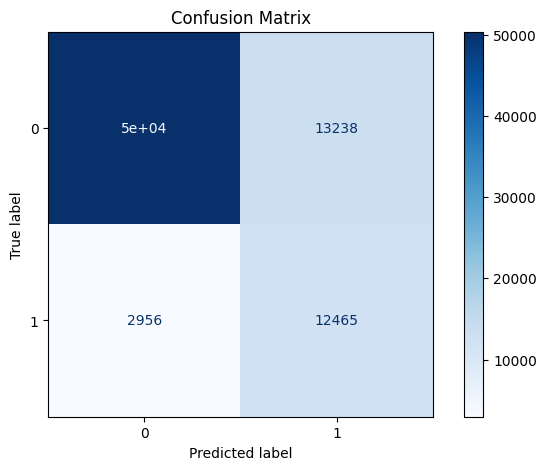

In [ ]:
#Model Evaluation
print(f"The accuracy for Training data is {model2.score(X_train,y_train)}")
print(f"The accuracy for Testing data is {model2.score(X_test,y_test)}")

print('Test F1 Score:',f1_score(y_test,y_pred_smote).round(2))


print('Test Recall Score:',recall_score(y_test,y_pred_smote).round(2))


print('Test Precision Score:',precision_score(y_test,y_pred_smote).round(2))


confusion_matrx = confusion_matrix(y_test, y_pred_smote)
print(confusion_matrx)

fig, ax = plt.subplots(figsize=(8, 5))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrx).plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

**Insights**

**Accuracy: 0.606 (~61%):**

The overall accuracy of the model is approximately 61%, indicating the proportion of correctly classified instances among the total instances.

**Precision:**

Precision is the ratio of true positive predictions to the total predicted positives.

Precision for class 0 (precision_0): 0.31 (31%)

Precision for class 1 (precision_1): 0.91 (91%)

Precision is high for class 1, indicating that when the model predicts class 1, it is correct about 91% of the time. However, precision is lower for class 0, suggesting that when the model predicts class 0, it is correct about 31% of the time.

**Recall:**

Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positives.

Recall for class 0 (recall_0): 0.77 (77%)

Recall for class 1 (recall_1): 0.57 (57%)

The model has a higher recall for class 0, indicating that it effectively identifies about 77% of the actual instances of class 0. However, the recall is lower for class 1, suggesting that it identifies about 57% of the actual instances of class 1.

**F1-Score:**

F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

F1-score for class 0 (f1-score_0): 0.44

F1-score for class 1 (f1-score_1): 0.70

The F1-scores reflect a trade-off between precision and recall. Class 1 has a higher F1-score, indicating a better balance between precision and recall for class 1 compared to class 0.

**Support:**

Support represents the number of actual occurrences of each class in the specified dataset.
Support for class 0: 11621 instances
Support for class 1: 47269 instances

We notice that the recall score is notably high, indicating our model can identify 80% of actual defaulters. However, the precision for the positive class is low; only 50% of the predicted defaulters are actual defaulters.

While this model effectively identifies a significant portion of defaulters, it risks denying loans to deserving customers due to the high rate of false positives.

Furthermore, the low precision contributes to a decrease in the F1 score to 60%, despite the accuracy being 80%.

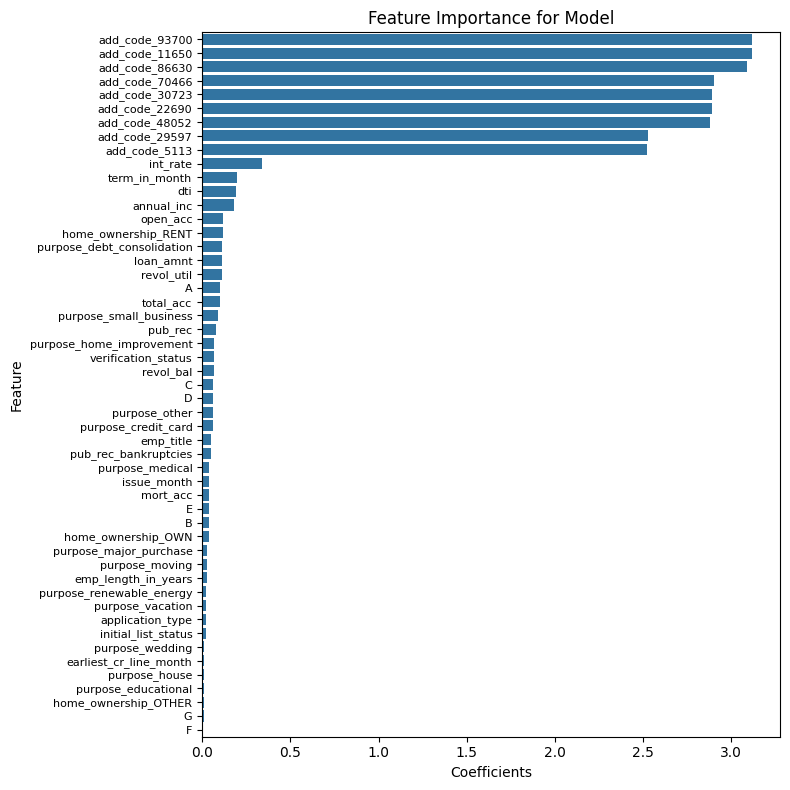

In [ ]:
feature_imp = pd.DataFrame({'Columns':X_train.columns,
                            'Coefficients':np.abs(model1.coef_[0])}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Multicollinearity check using Variance Inflation Factor (VIF) -

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF.
In VIF method, we pick each independent feature and regress it against all of the other independent features.
VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF = 1/1-R2

In [ ]:
# Calculate VIF for each feature
def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

calc_vif(X_train)[:5]

Feature    VIF
30  purpose_debt_consolidation  21.26
29         purpose_credit_card  15.14
32    purpose_home_improvement   5.86
37               purpose_other   5.27
2                     int_rate   4.81

In [ ]:
X_train.drop('purpose_debt_consolidation',axis=1,inplace=True)
X_test.drop('purpose_debt_consolidation',axis=1,inplace=True)
calc_vif(X_train)[:5]

0.7969738373564091


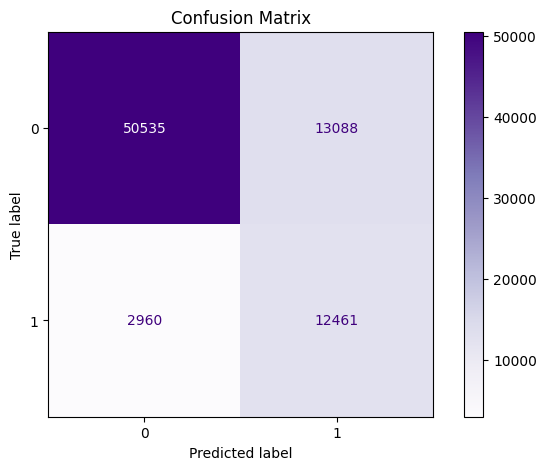

In [ ]:

X_train=X_train.drop(columns=['G','F','home_ownership_OTHER'])
X_test=X_test.drop(columns=['G','F','home_ownership_OTHER'])
model3=LogisticRegression(class_weight='balanced')
model3.fit(X_train,y_train)

print(model3.score(X_test,y_test))

y_pred3=model3.predict(X_test)
confusion_matrx = confusion_matrix(y_test, y_pred3)

fig, ax = plt.subplots(figsize=(8, 5))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrx).plot(ax=ax, cmap='Purples')
plt.title("Confusion Matrix")
plt.show()

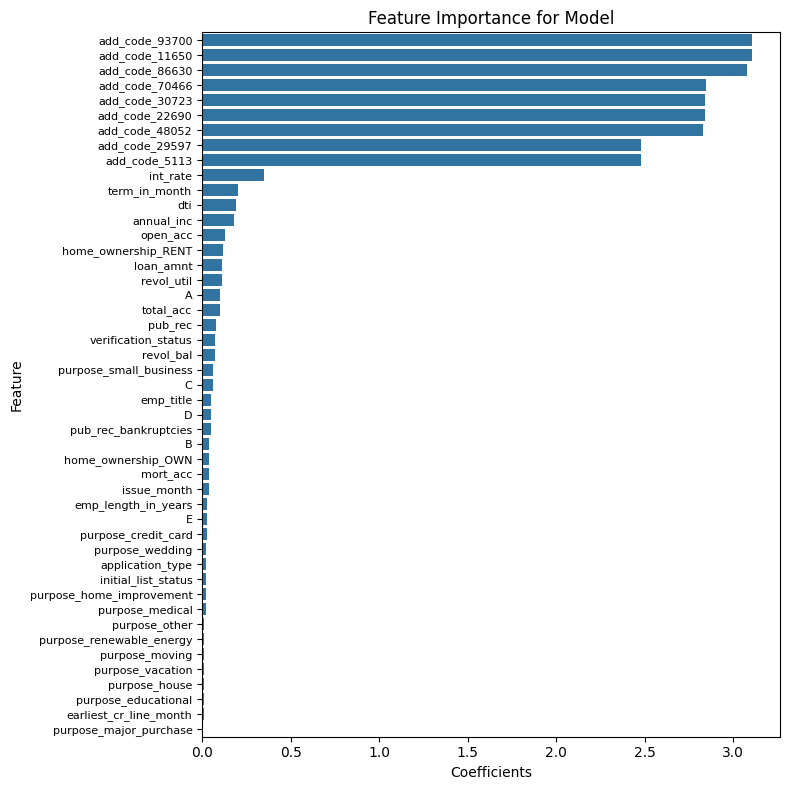

In [ ]:
feature_imp = pd.DataFrame({'Columns':X_train.columns,
                            'Coefficients':np.abs(model3.coef_[0])}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# Verify best model by searching best hyperparameters to enhance model's performance
model = LogisticRegression(class_weight='balanced')
param_grid = {
    'penalty': ['l1', 'l2','elastic_net'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
from sklearn.model_selection import GridSearchCV
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Test Accuracy: 0.8019077981883508


In [ ]:
print('Precision score is',precision_score(y_test, y_pred))
print('Recall score is',recall_score(y_test, y_pred))
print('F1 score is',f1_score(y_test, y_pred))

Precision score is 0.49524191929331457
Recall score is 0.7998184294144348
F1 score is 0.6117145266081436


In [ ]:
print(classification_report(y_test,best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     63623
           1       0.50      0.80      0.61     15421

    accuracy                           0.80     79044
   macro avg       0.72      0.80      0.74     79044
weighted avg       0.86      0.80      0.82     79044



#### ROC Curve -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

- TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:

- FPR=(FP)/(FP+TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

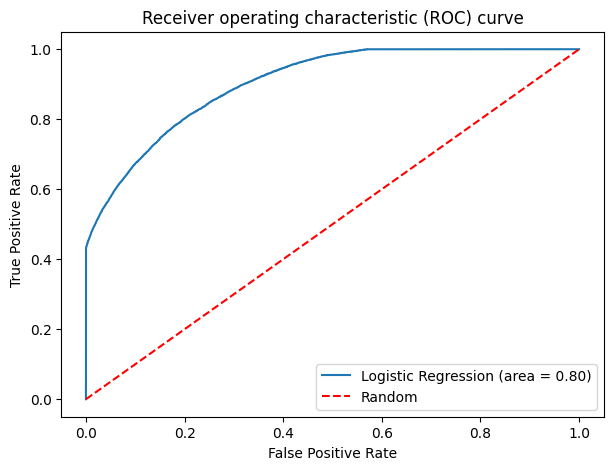

In [ ]:
# using Class weights model to check ROC
logit_roc_auc = roc_auc_score(y_test, model3.predict(X_test))
y_prob= model3.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_prob)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

Insights

An AU-ROC value of 0.80 suggests that, on average, the model has a good ability to distinguish between the positive and negative classes, but there is room for improvement.

#### AUC (Area under the ROC Curve) -

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).


AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

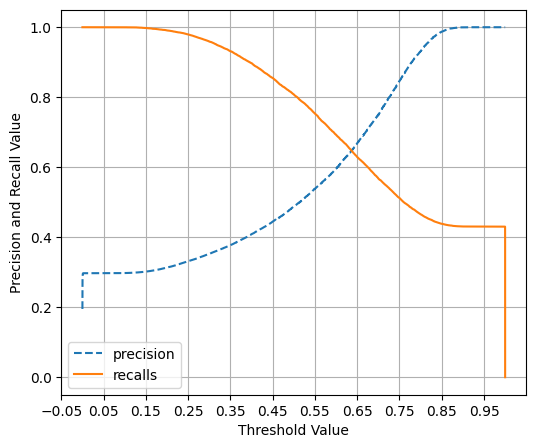

In [ ]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.figure(figsize=(6,5))
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, model3.predict_proba(X_test)[:,1])

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, model3.predict_proba(X_test)[:,1])
abs_diff = np.abs(precisions[:-1] - recalls[:-1])

best_threshold = thresholds[np.argmin(abs_diff)]

print(f"Best Threshold (Precision ≈ Recall): {best_threshold}")


# Train the logistic regression model with threshold
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

y_pred_threshold = (y_prob >= best_threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred_threshold)
print(f"Accuracy with threshold {threshold}: {accuracy}")

print(classification_report(y_test,y_pred_threshold))

Best Threshold (Precision ≈ Recall): 0.636623264816922
Accuracy with threshold 0.63: 0.8623298416072062
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     63623
           1       0.65      0.65      0.65     15421

    accuracy                           0.86     79044
   macro avg       0.78      0.78      0.78     79044
weighted avg       0.86      0.86      0.86     79044



In [ ]:
df1=pd.read_csv('logistic_regression.csv')
df1.dropna(inplace=True)

In [ ]:
df1.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                  'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)
df1.shape


(335867, 21)

In [ ]:
df1['term']=df1['term'].str[:2].astype('int')
df1['zipcode']=df1['address'].str.split().str[-1].str.strip().astype('int')
df1['address']=df1['address'].str.split().str[-1].str.strip().astype('int')
df1 = pd.get_dummies(df1, columns=["grade","purpose","zipcode","home_ownership"], drop_first=True)
df1['verification_status']=np.where(df1['verification_status']=='Not Verified',0,1)
df1['initial_list_status']=np.where(df1['initial_list_status']=='f',1,0)
df1['loan_status']=np.where(df1['loan_status']=='Fully Paid',0,1)
le.fit_transform(df1['application_type'])
df1['application_type']=le.transform(df1['application_type'])
df1.drop(columns=['address'],inplace=True)

In [ ]:
X=df1.drop(columns=['loan_status'])
y=df1['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std_scl=StandardScaler()
X_train=pd.DataFrame(std_scl.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(std_scl.transform(X_test),columns=X.columns)

model=LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)
print(model.score(X_test,y_test),model.score(X_train,y_train))
print(classification_report(y_test, model.predict(X_test)))
confusion_matrix(y_test, model.predict(X_test))

0.7967666061273707 0.7987331266538391
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     53894
           1       0.49      0.81      0.61     13280

    accuracy                           0.80     67174
   macro avg       0.72      0.80      0.74     67174
weighted avg       0.85      0.80      0.81     67174



array([[42776, 11118],
       [ 2534, 10746]])

In [ ]:
df1.columns

**Insights**

- From the values mentioned above it can be observed that the model is performing as expected and no further hypertuning can improve the preformance.

- The low precision value for class 0 can be due to the imbalance of data for the same, if more real time data for class 0 can be provided, the model can be trained better and the performance might increase.

- Also since the data consists of a lot of categorical columns a different ML model might prove better in predicting the outcome than Logistic Regression.

- The model's precision value of 0.90 signifies that it accurately predicts the likelihood of loan repayment in 90% of cases.

- The model's precision value of 0.38 for charged-off loans indicates that, among the instances predicted as charged off, only 38% were correctly classified, emphasizing a lower accuracy in predicting this specific class.

- The model's sensitivity value of 0.71 for loan repayment signifies that it accurately identifies 71% of the instances where loans are repaid, demonstrating its ability to effectively capture a significant portion of the actual loan repayment cases.

- The model's sensitivity value of 0.71 for charged-off loans signifies that it correctly identifies 71% of the actual charged-off instances, reflecting its ability to capture a substantial portion of the relevant cases for this class.

The features that heavily affected the models outcome are
- grade - LoanTap assigned loan grade (Risk ratings by LoanTap)
- pub_rec - Negative records on borrower's public credit profile.

From the analysis performed it can also be observed that the applicants for regions with pincodes('11650'm '86630' and '93700') have not made any loan repayment. It can be inferred that either
- The data is missing w.r.t. loan repayment for these regions or
- The applicants from regions with pincodes('11650'm '86630' and '93700') are highly unlikely to repay the loan granted by LoanTap.
- LoanTap should carefully review the applicants belonging to above regions.

In [ ]:
msm,am

In [ ]:
from ydata_profiling import ProfileReport
profile= ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile



Tradeoff Questions:
How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. (10 Points)
Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. (10 Points)
Actionable Insights & Recommendations (10 Points)

Questionnaire (Answers should present in the text editor along with insights):

What percentage of customers have fully paid their Loan Amount?
Comment about the correlation between Loan Amount and Installment features.
The majority of people have home ownership as _______.
People with grades ‘A’ are more likely to fully pay their loan. (T/F)
Name the top 2 afforded job titles.
Thinking from a bank's perspective, which metric should our primary focus be on..
ROC AUC
Precision
Recall
F1 Score
How does the gap in precision and recall affect the bank?
Which were the features that heavily affected the outcome?
Will the results be affected by geographical location? (Yes/No)

<center>
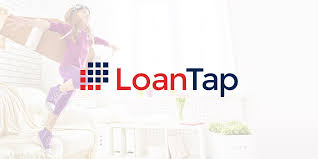
</center>